In [50]:
import numpy as np
import matplotlib.pyplot as plt

This code was created by Guilherme Vieira (@guilhermesechat/sechat.blog for the youtube channel https://www.youtube.com/user/guilhermewellsful).

In [51]:
#number of divisions
div = int((1E4)/2)
#time-step
step = 1E-4
m = 1
t_tot = step*div

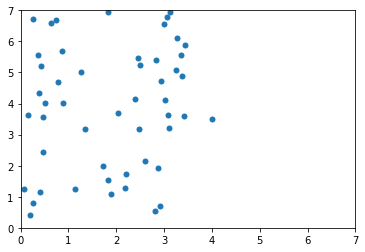

In [60]:
#O número de partículas é N
N = 50
L = 7
#defining the 3 main positions, past, present, future
particles_prev = np.zeros((N,2))
particles = np.zeros((N,2))
particles_fut = np.zeros((N,2))

#initial random values in a square box
Initial = np.array([[((1 - np.random.rand())/2)*L,np.random.rand()*L] for i in range(N)])
Initial[0,:] = [4,3.5]

#particles_prev = Initial[:]
#particles = Initial[:]
np.copyto(particles_prev,Initial)
np.copyto(particles,Initial)
np.copyto(particles_fut,Initial)


plt.plot(particles_prev[:,0],particles_prev[:,1],'.', markersize = 10)
plt.ylim(0,L)
plt.xlim(0,L)
plt.show()

In [61]:
#defining distances for on particle, it gives an array with all distances from on particle to the others and itself, 0
distancia = np.zeros(N,dtype=complex)
def dist(i):
    for c in range(N):
        dif = particles_prev[i] - particles_prev[c]
        distancia[c] = np.linalg.norm(dif) +1j*np.angle(dif[0] + 1j*dif[1])
        #it gives the magnitude and the angle of interaction, that's why a complex value
    return distancia

In [62]:
#the next position for a particle i, based on its present and previous values, and the for contribution
def prox_pos(i):
    particles_fut[i,:] = np.dot(2,particles[i,:]) - particles_prev[i,:] + np.dot(((step**2)/m),force)
    #condições de contorno periódicas estilo pac-man, se uma partícula sai na direita, ela aparece na esquerda, não leva em conta perceber partícula periodicamente, a força só atua na sua caixa, preguiça
    if particles_fut[i,0] < 0:
        particles_fut[i,0] = particles_fut[i,0] + ((abs(particles_fut[i,0])//L)+1)*L
    elif particles_fut[i,0] > L:
        particles_fut[i,0] = particles_fut[i,0] - (abs(particles_fut[i,0])//L)*L                    
                
    if particles_fut[i,1] < 0:
        particles_fut[i,1] = particles_fut[i,1] + ((abs(particles_fut[i,1])//L)+1)*L   
    elif particles_fut[i,1] > L:
        particles_fut[i,1] = particles_fut[i,1] - (abs(particles_fut[i,1])//L)*L    
    return particles_fut[i,:]

In [63]:
def F(i):
    #the force acting on a particle, it gives at the end fx an fy,    
    f = np.zeros((2))
    for u in range(N):
        dist(i)
        d = np.real(dist(i)[u])
        #limiting the range of the force
        if d < 0.1 and d !=0:
            angle = np.imag(dist(i)[u])
            
            v1 = (particles[i,0] - particles_prev[i,0] + 1j*(particles[i,1] - particles_prev[i,1]))/step
            v1_magn = np.linalg.norm(v1)
            v1_angle = np.angle(v1)

            v2 = (particles[u,0] - particles_prev[u,0] + 1j*(particles[u,1] - particles_prev[u,1]))/step
            v2_magn = np.linalg.norm(v2)
            v2_angle = np.angle(v2)
            
            v1x = v2_magn*np.cos(v2_angle - angle)*np.cos(angle) + v1_magn*np.sin(v1_angle - angle)*np.cos(angle + (np.pi)/2)
            v1y = v2_magn*np.cos(v2_angle - angle)*np.sin(angle) + v1_magn*np.sin(v1_angle - angle)*np.sin(angle + (np.pi)/2)
            
            f = [v1x/step,v1y/step]

    return f

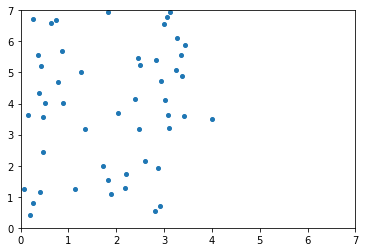

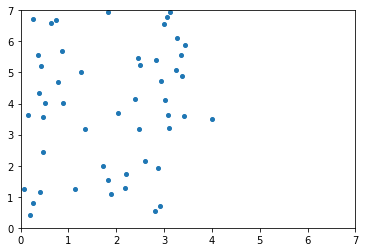

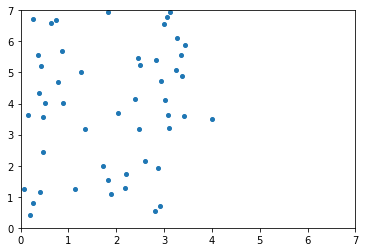

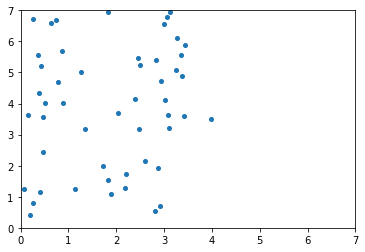

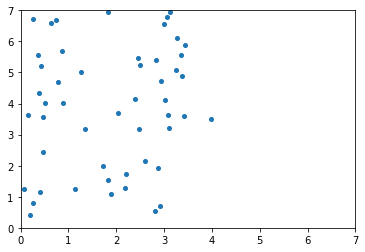

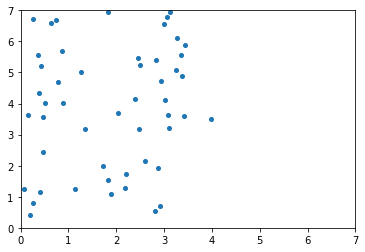

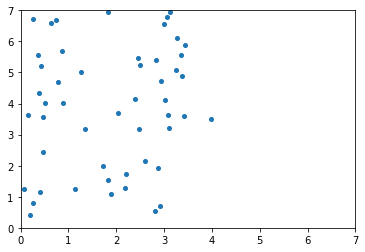

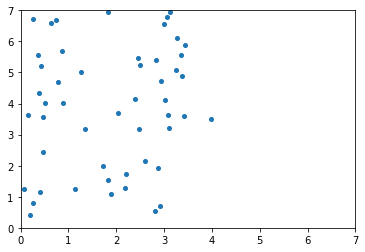

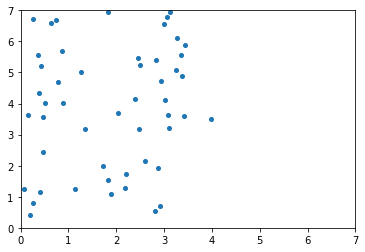

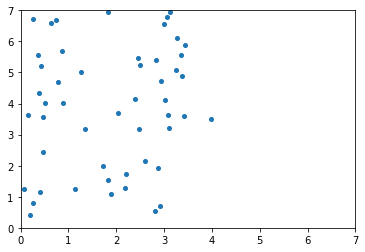

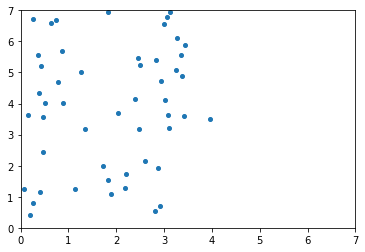

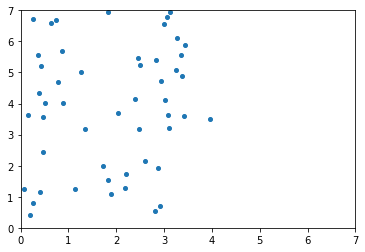

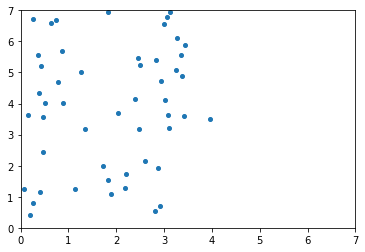

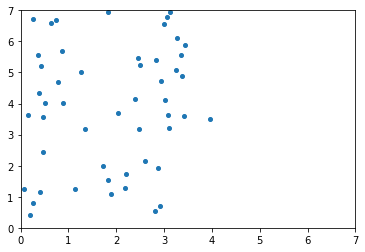

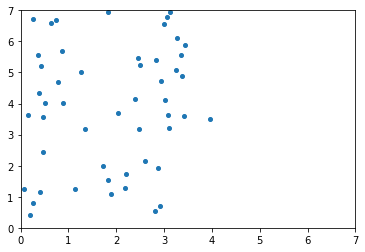

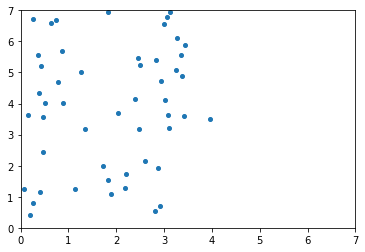

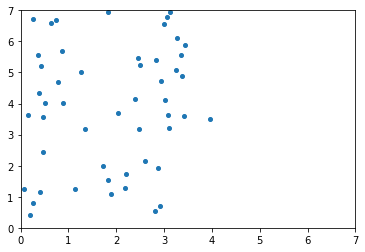

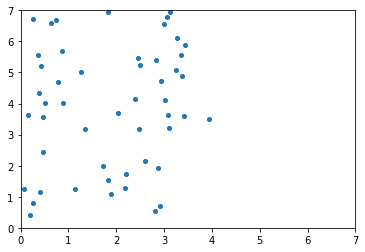

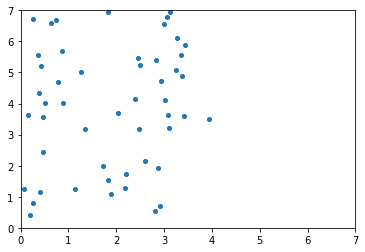

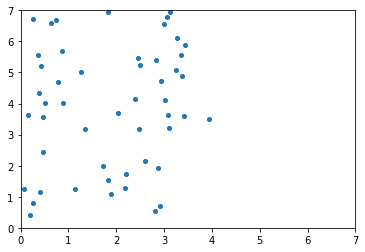

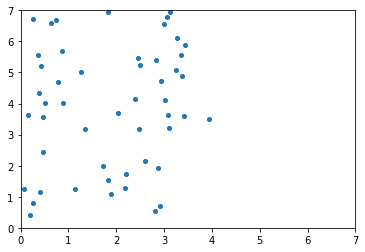

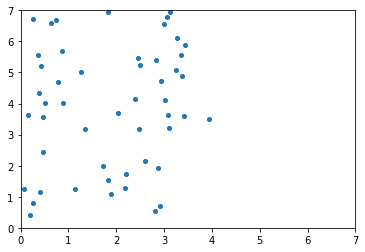

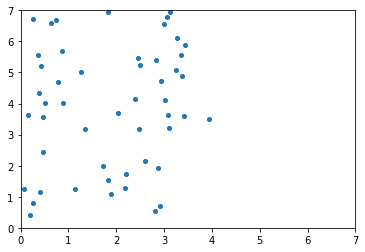

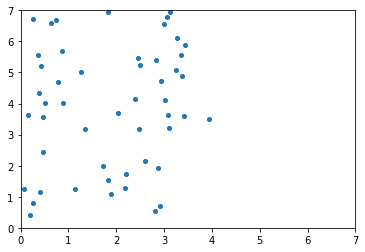

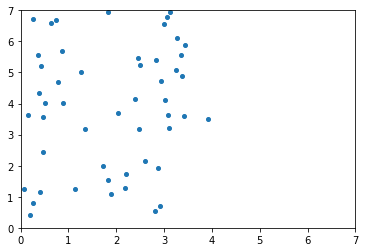

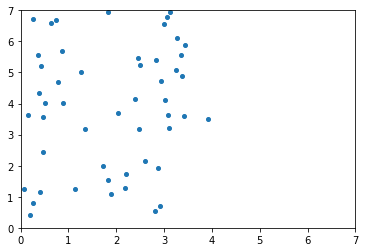

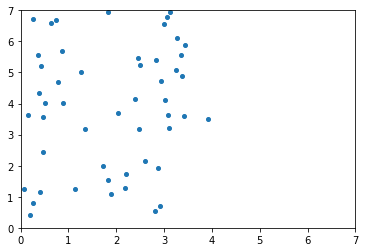

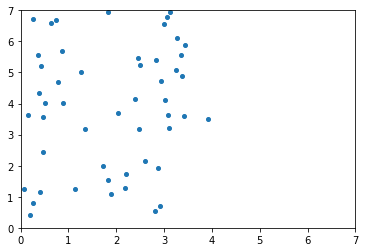

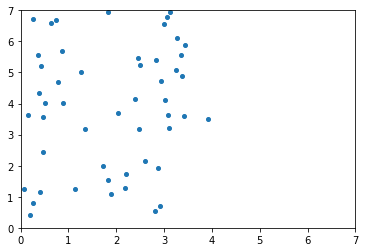

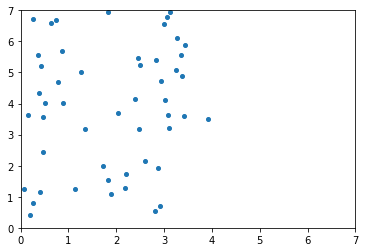

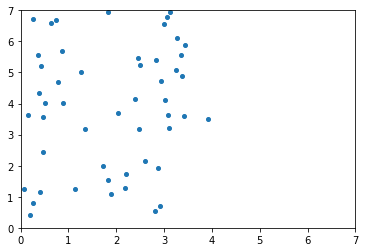

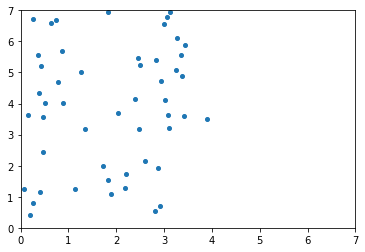

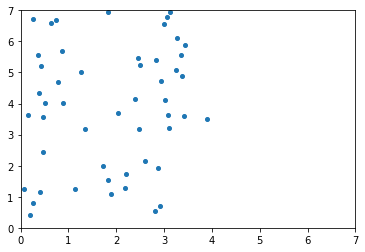

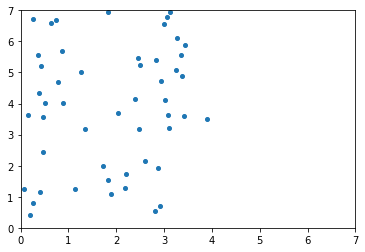

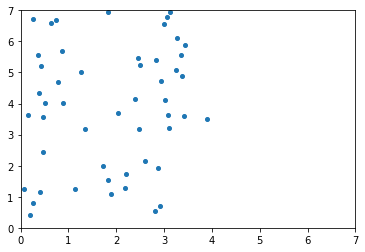

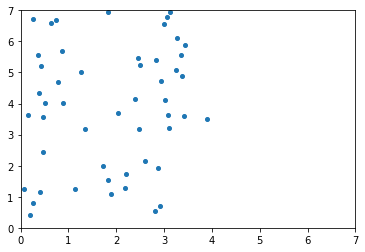

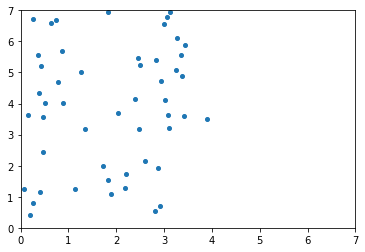

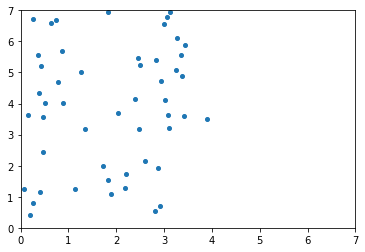

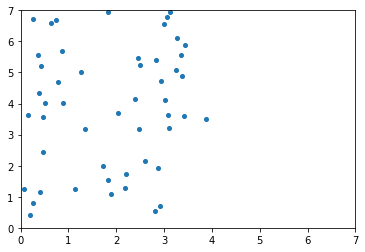

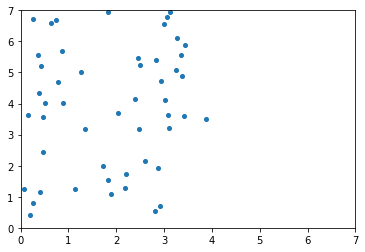

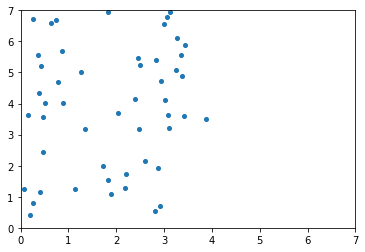

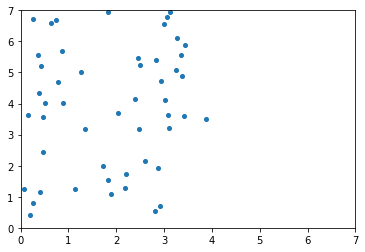

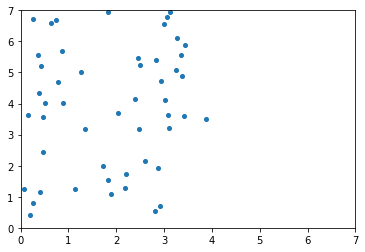

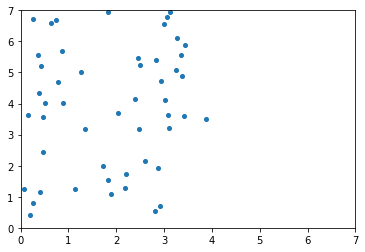

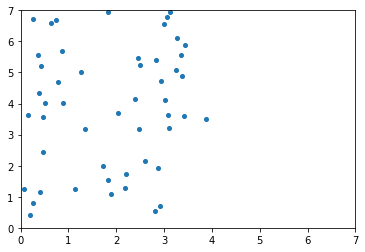

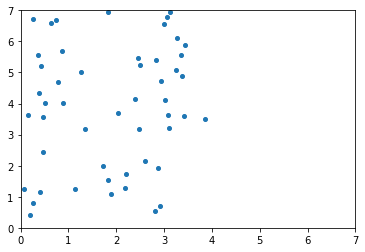

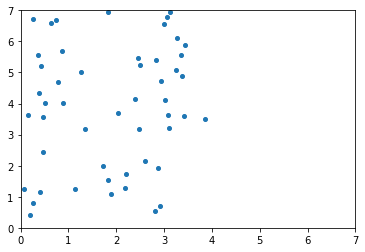

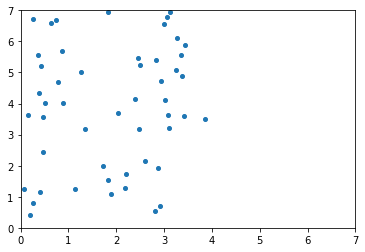

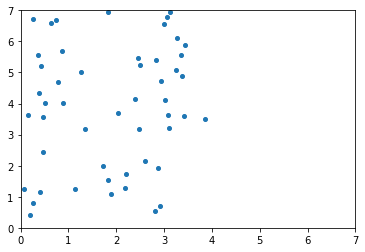

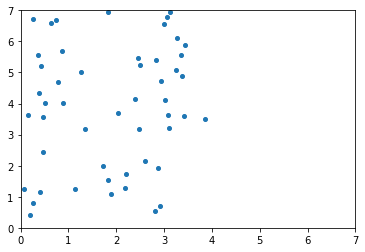

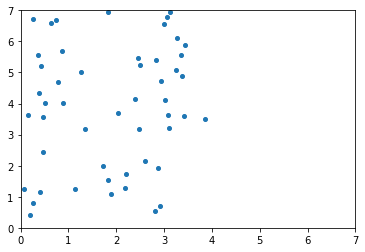

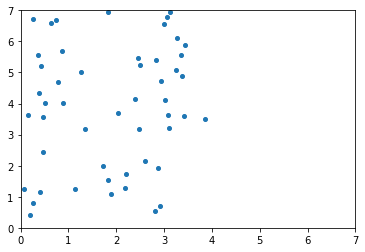

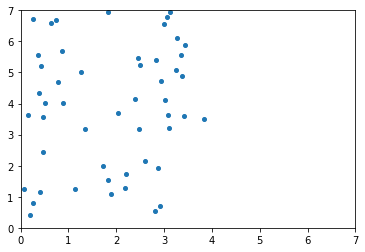

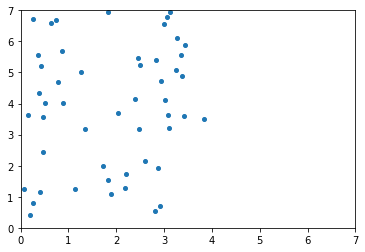

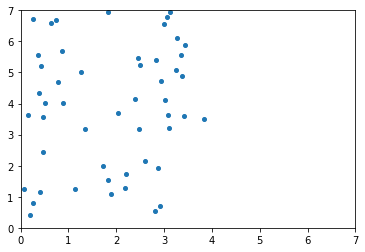

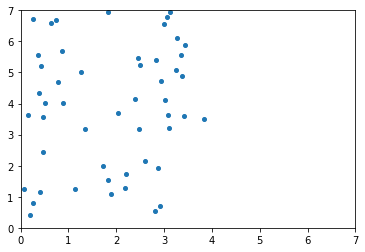

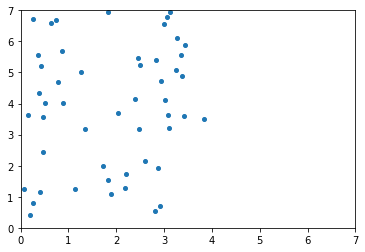

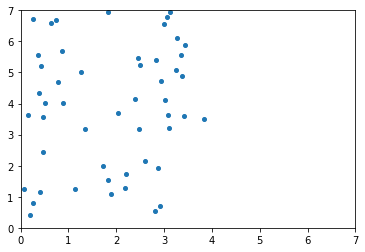

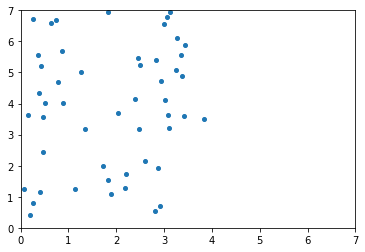

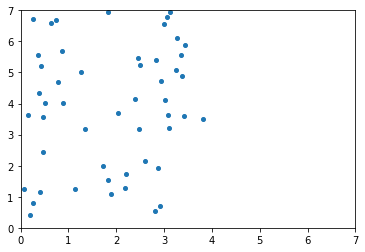

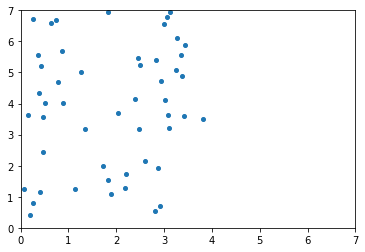

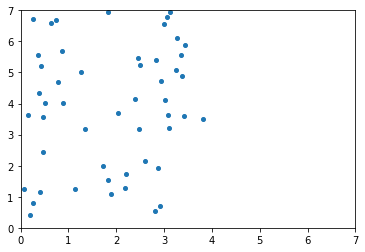

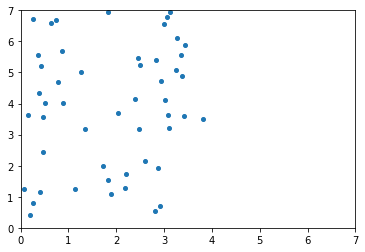

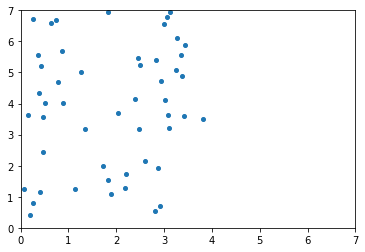

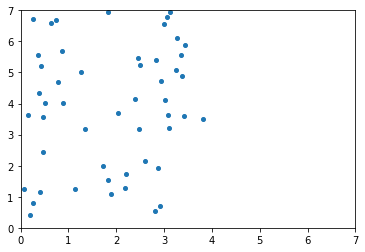

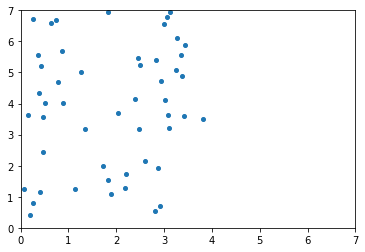

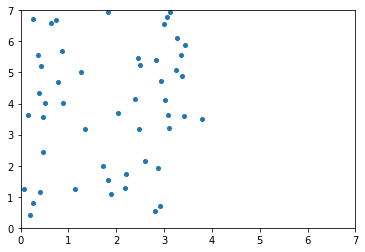

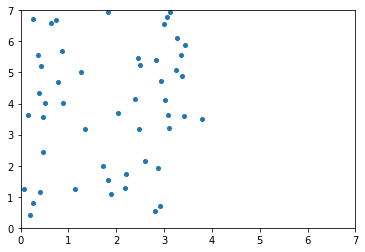

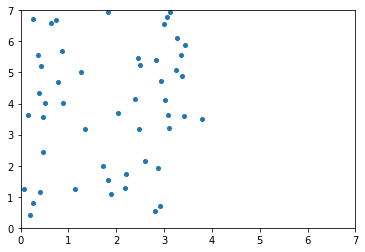

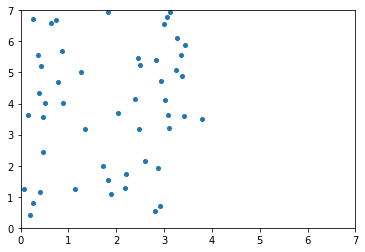

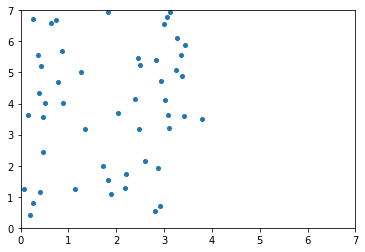

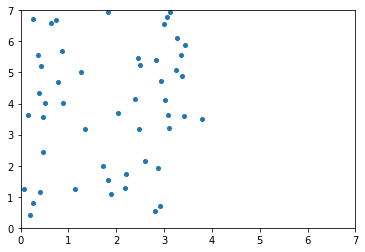

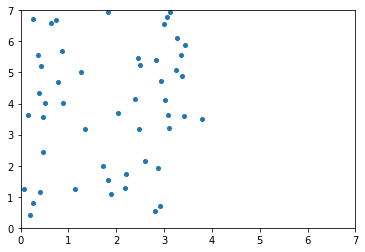

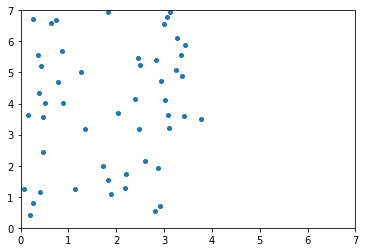

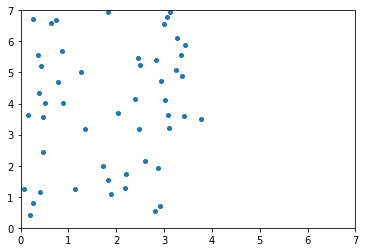

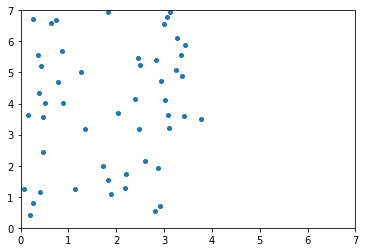

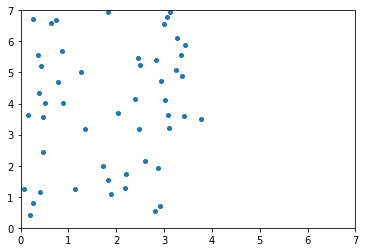

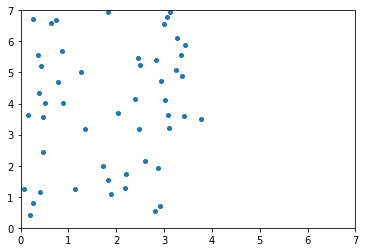

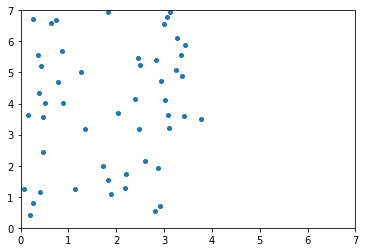

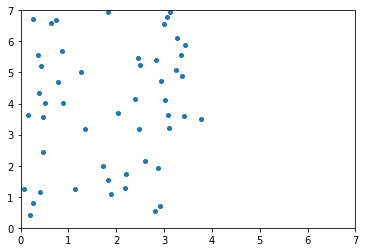

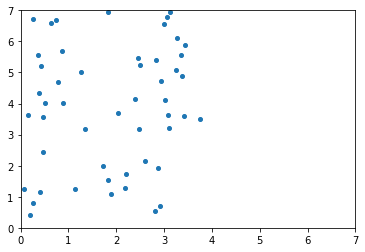

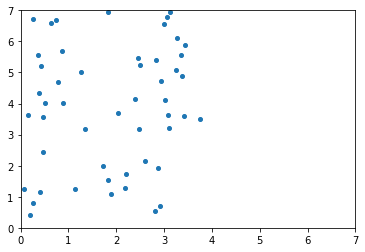

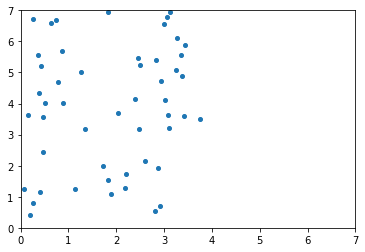

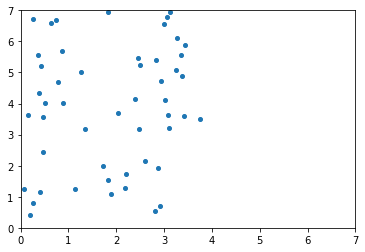

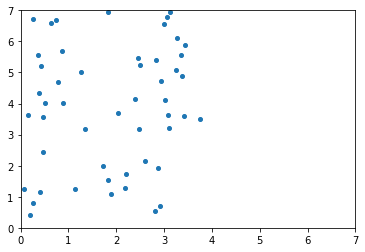

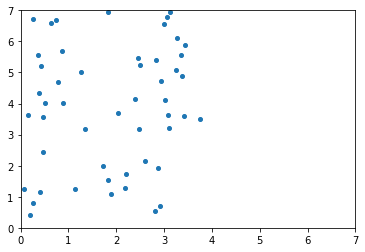

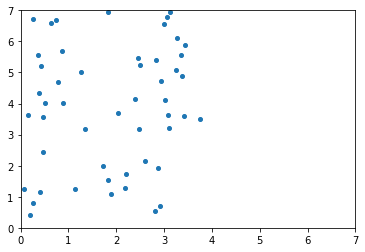

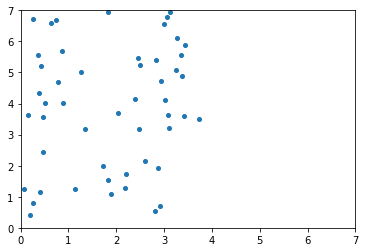

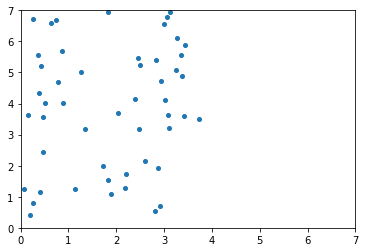

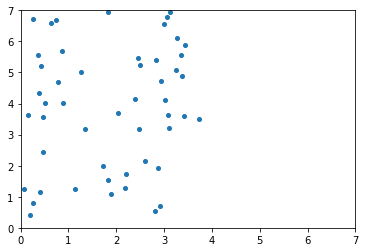

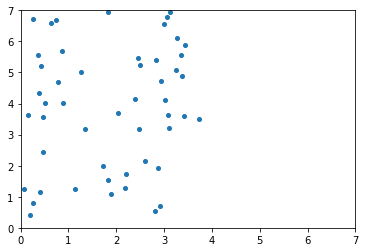

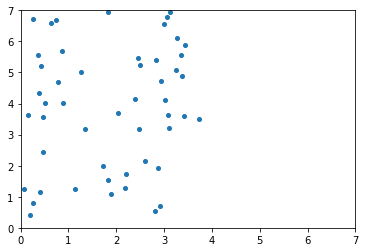

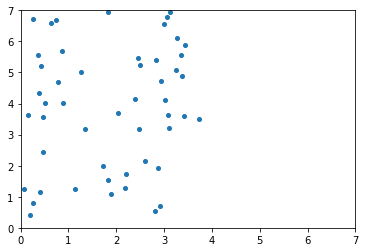

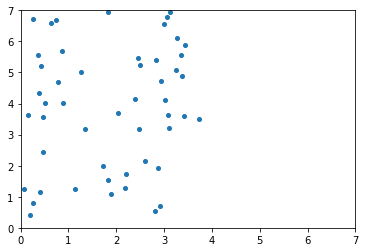

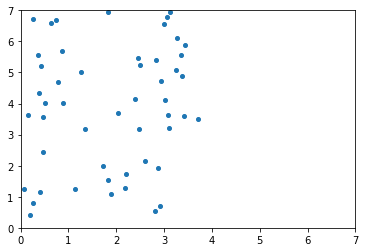

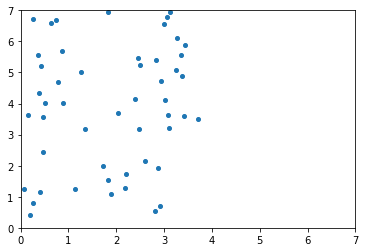

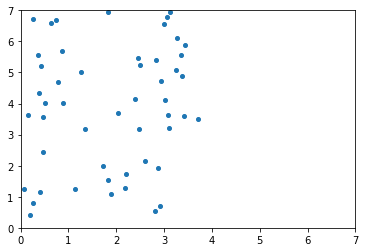

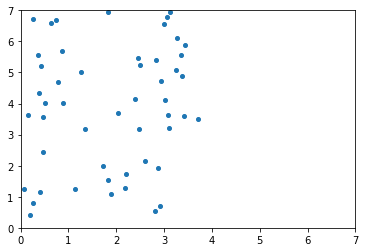

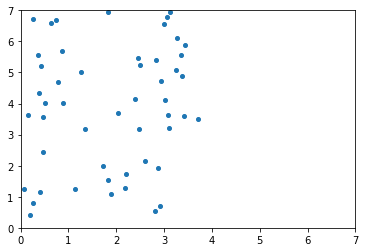

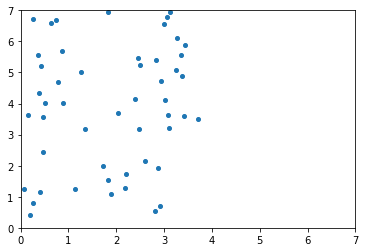

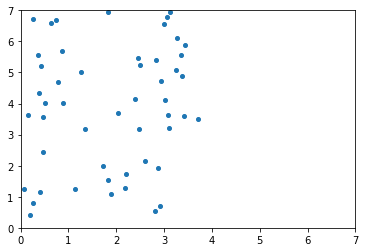

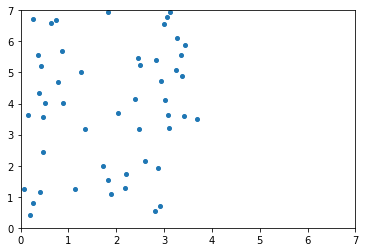

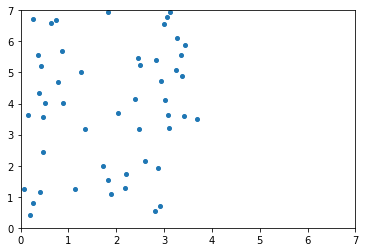

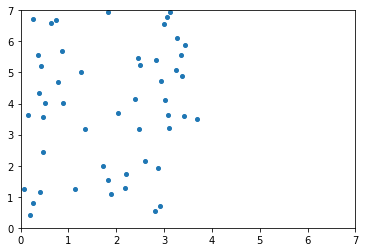

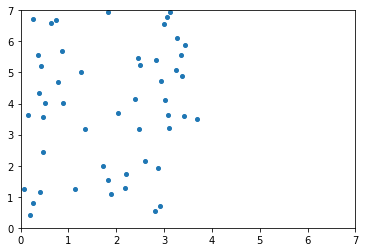

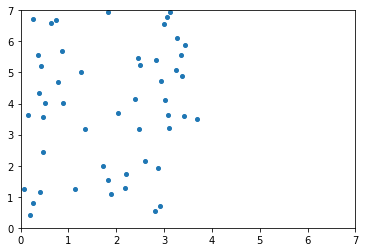

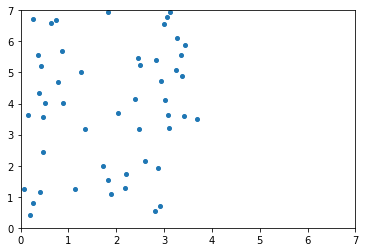

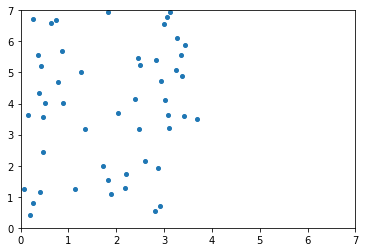

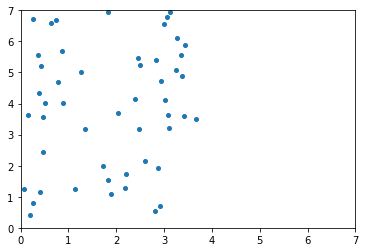

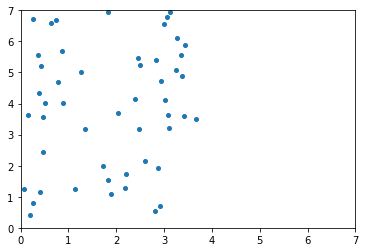

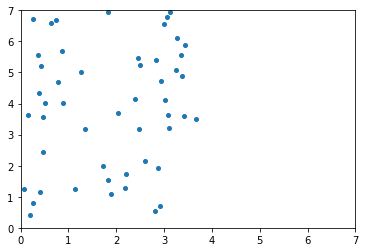

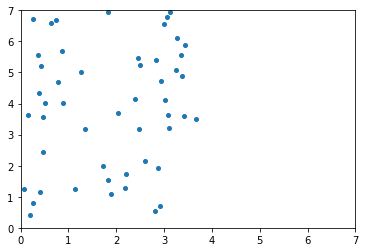

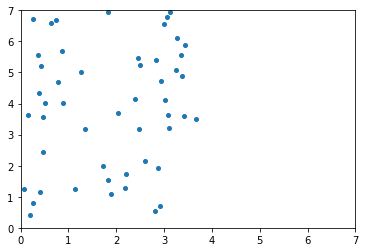

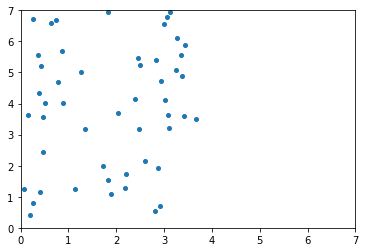

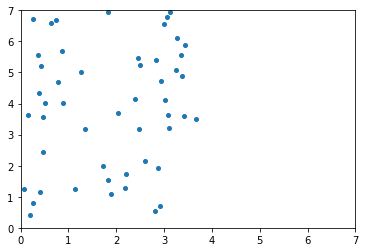

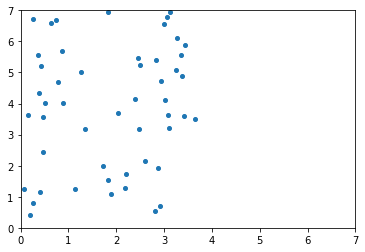

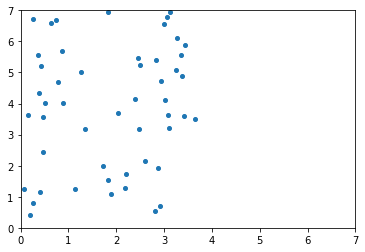

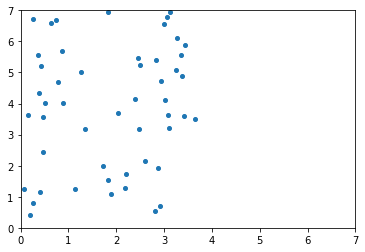

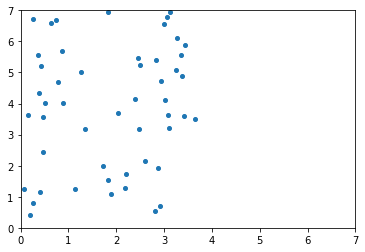

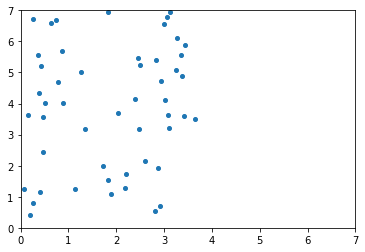

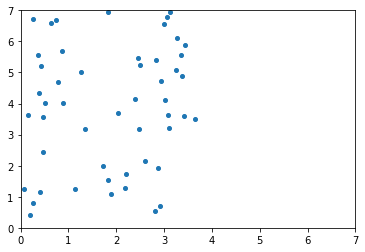

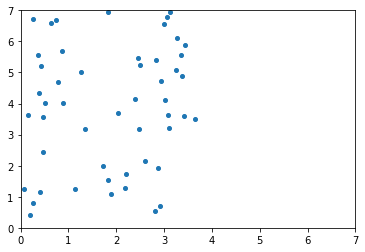

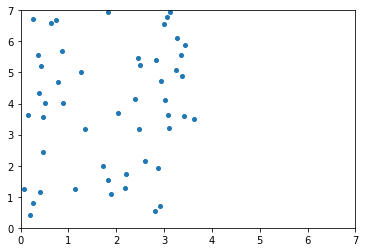

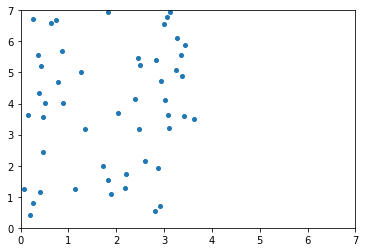

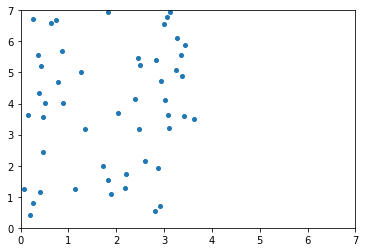

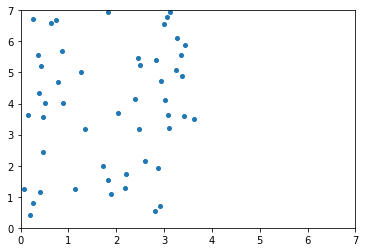

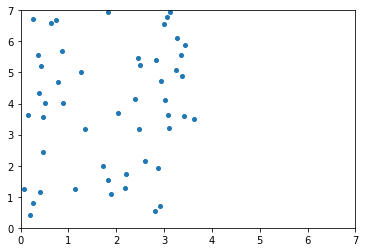

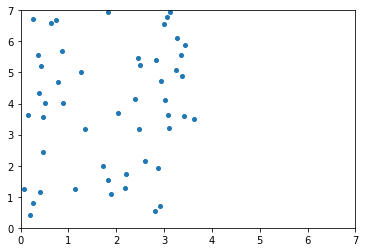

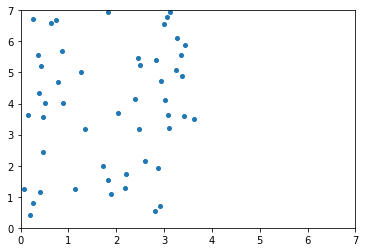

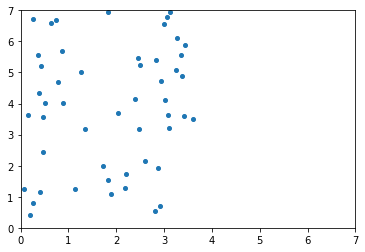

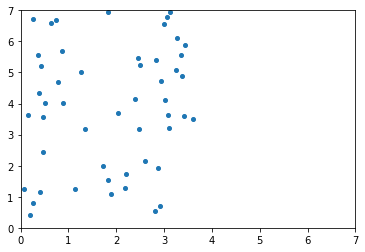

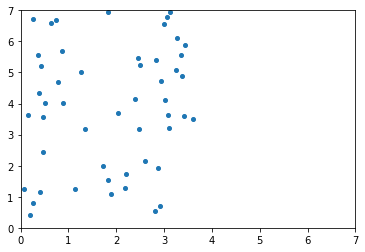

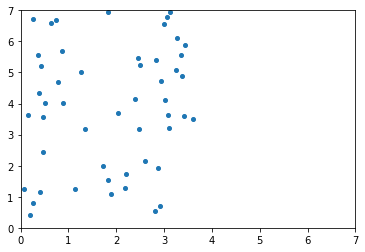

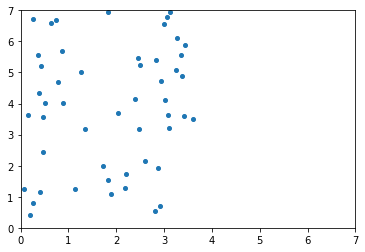

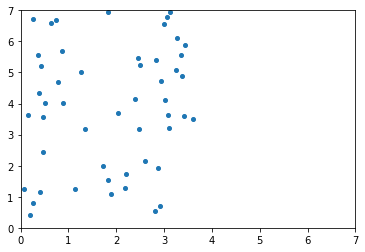

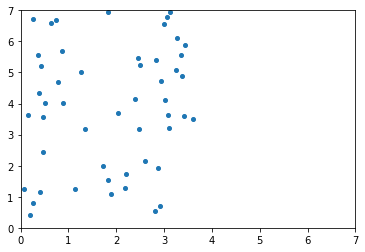

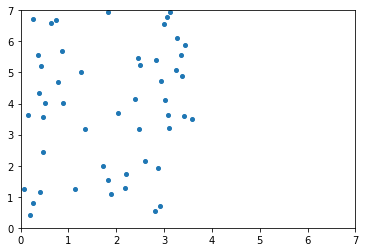

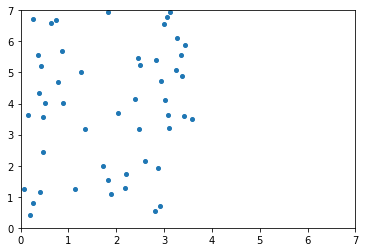

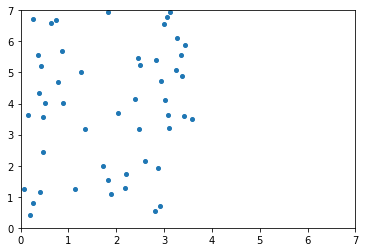

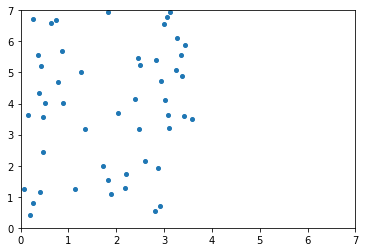

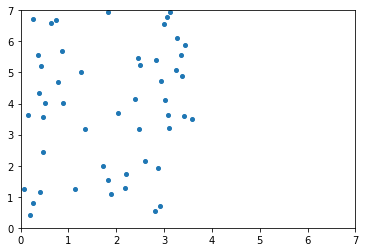

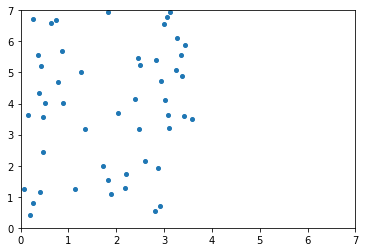

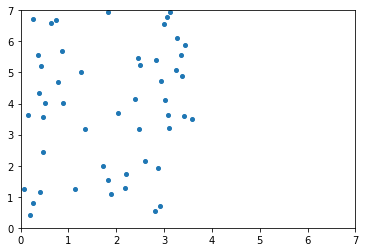

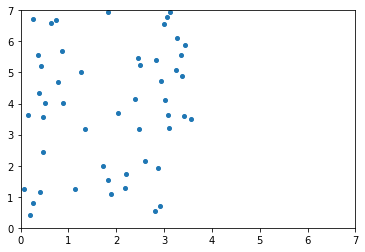

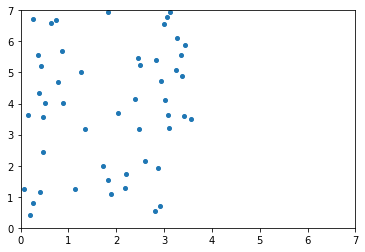

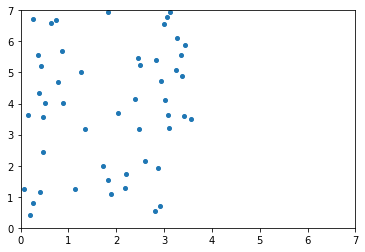

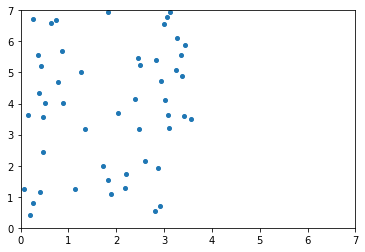

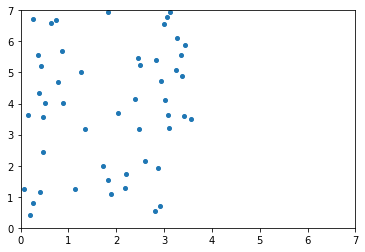

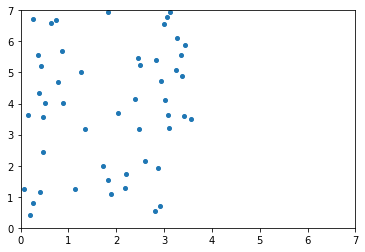

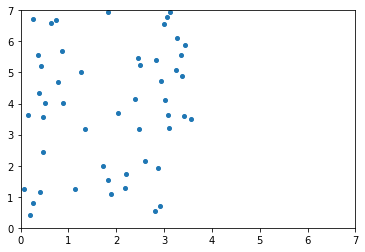

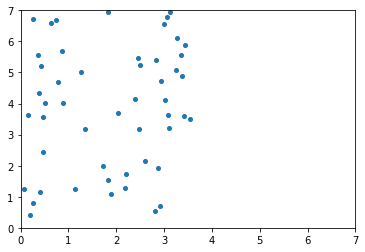

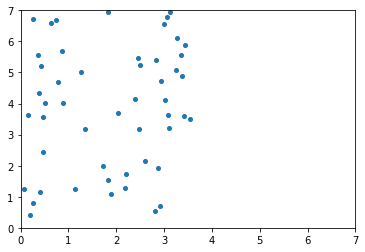

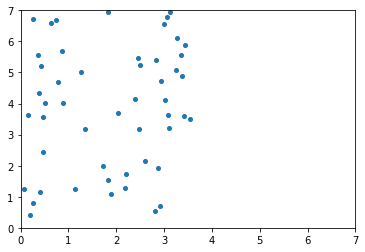

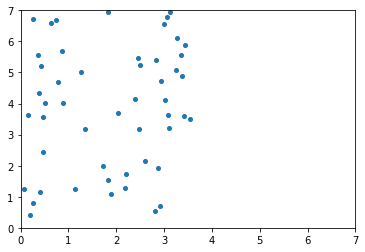

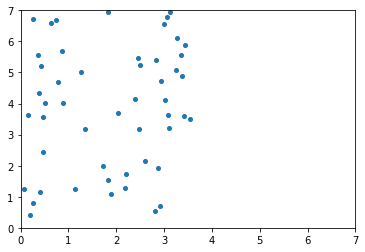

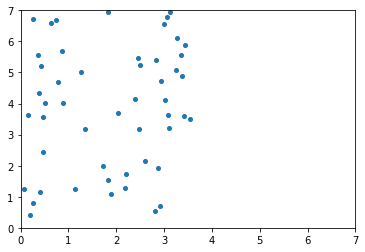

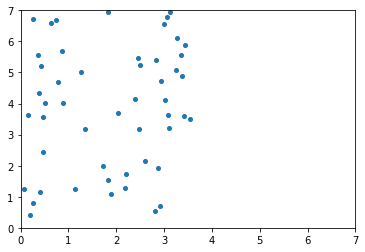

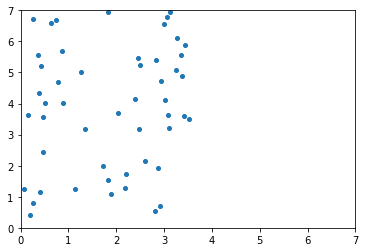

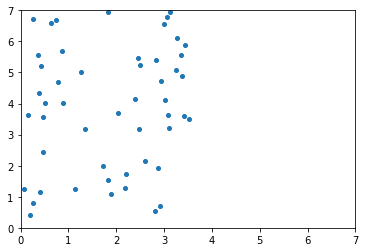

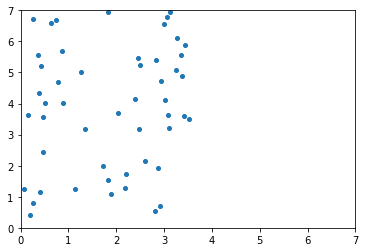

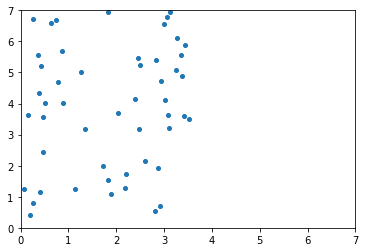

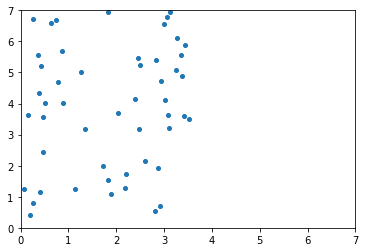

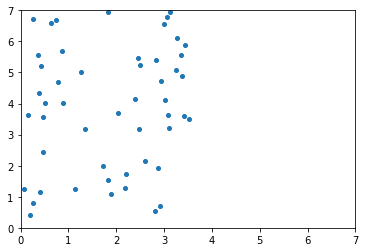

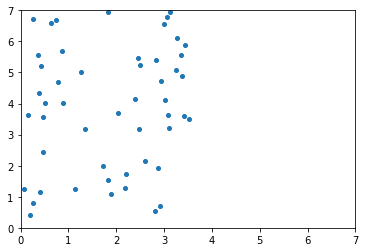

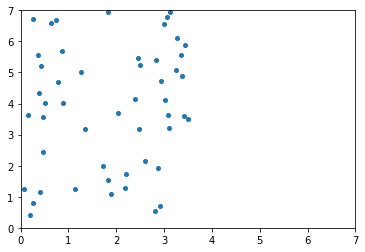

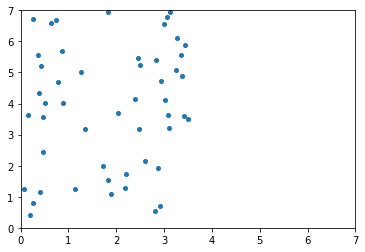

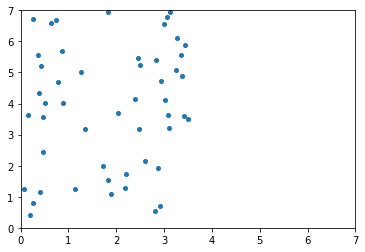

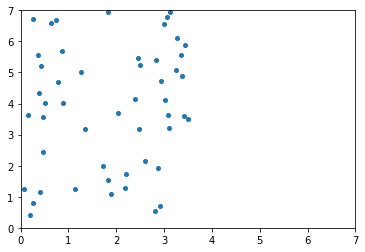

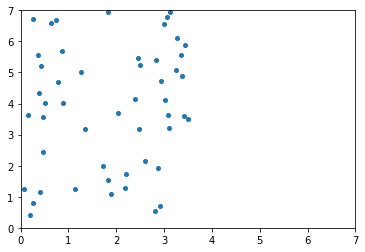

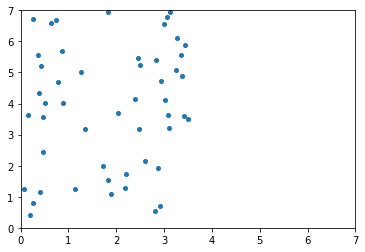

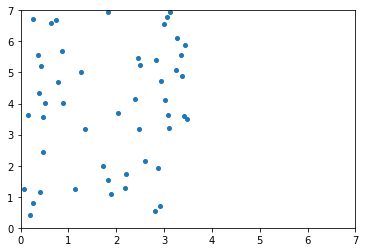

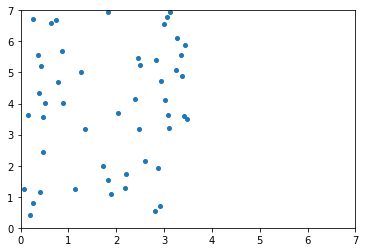

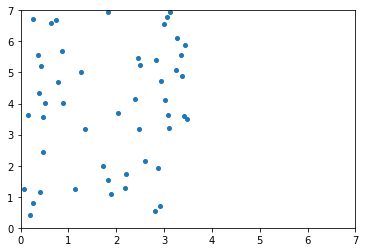

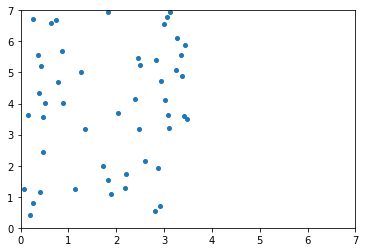

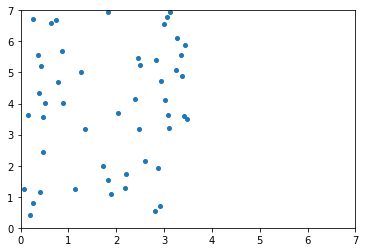

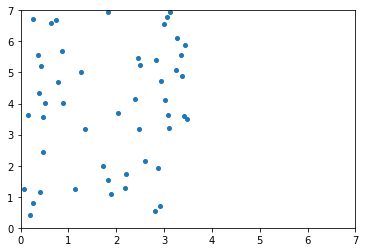

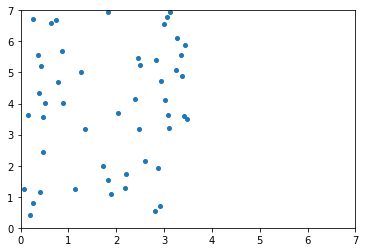

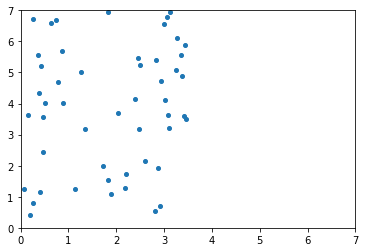

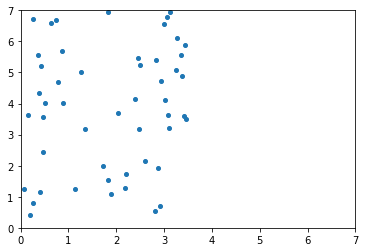

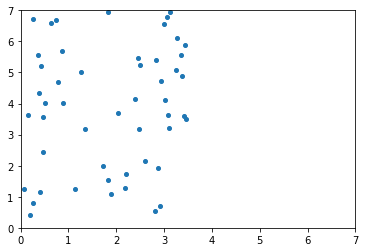

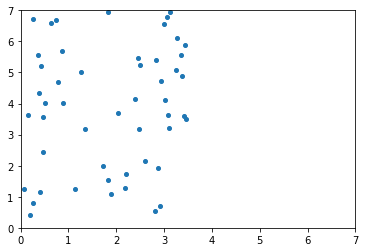

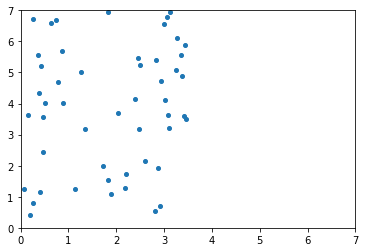

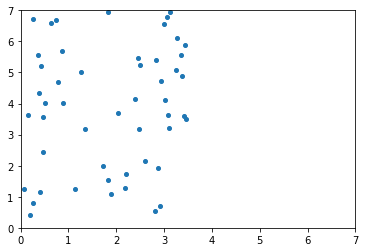

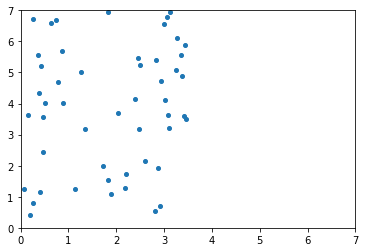

bateu


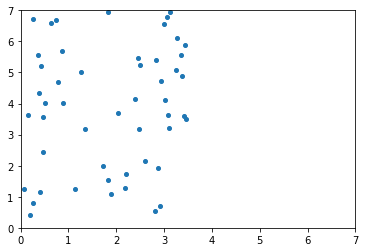

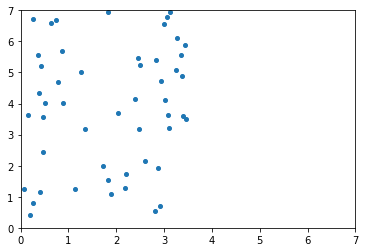

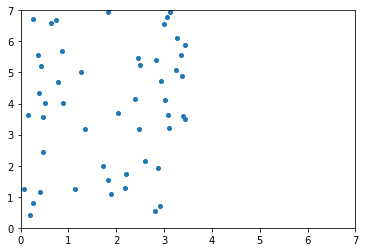

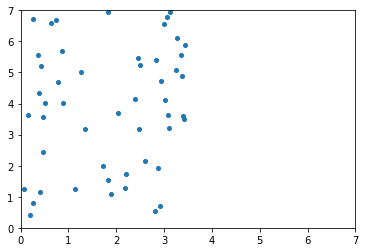

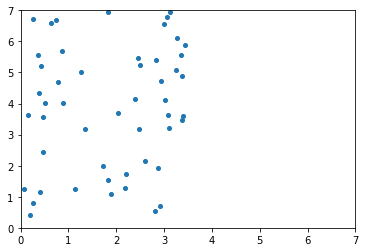

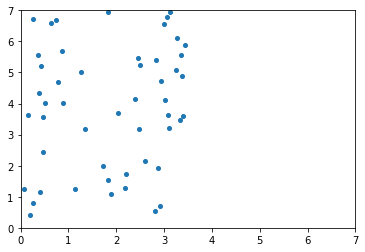

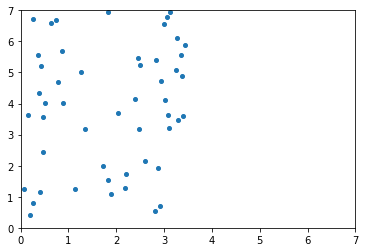

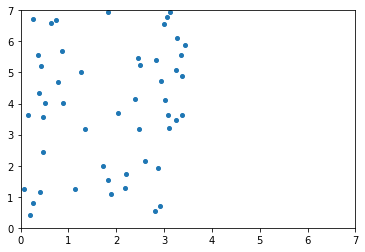

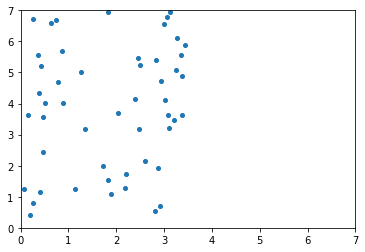

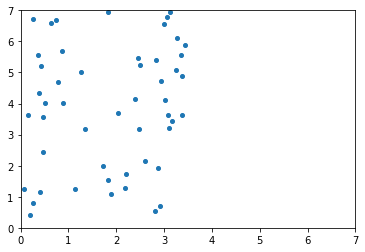

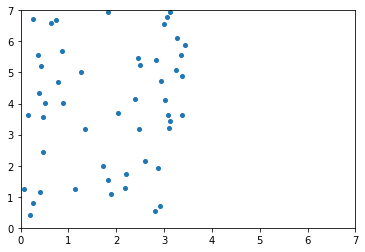

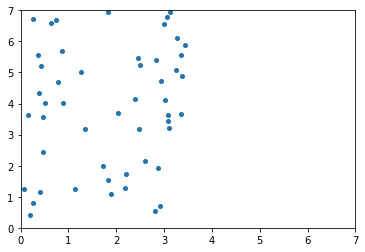

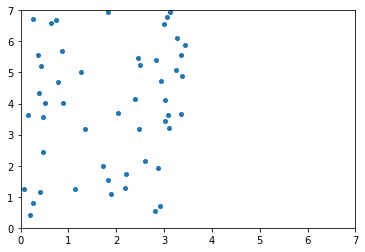

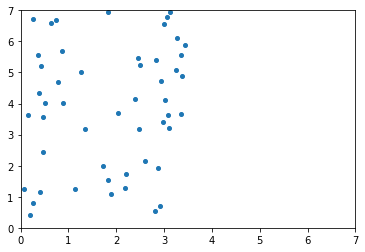

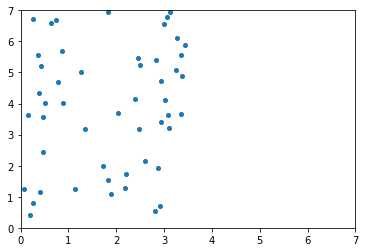

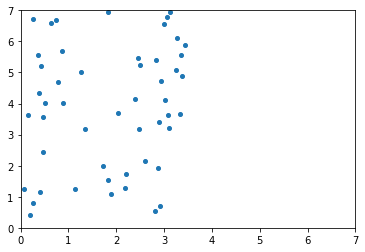

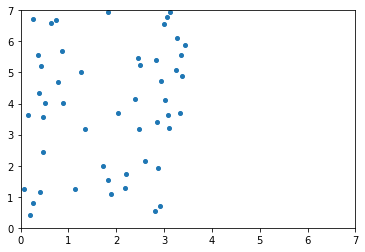

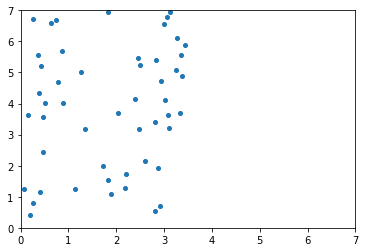

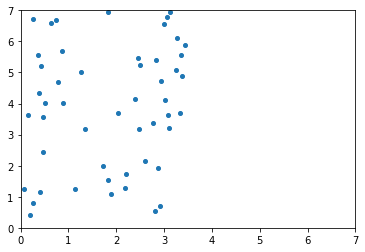

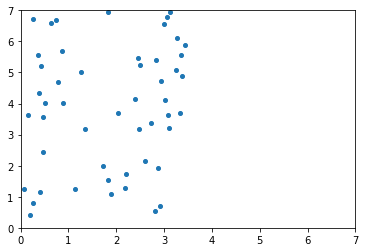

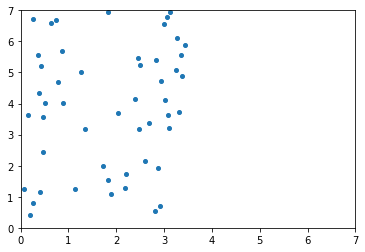

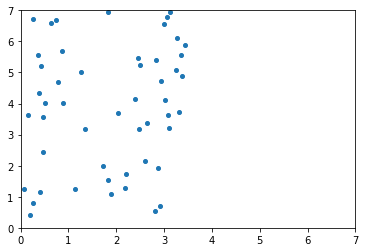

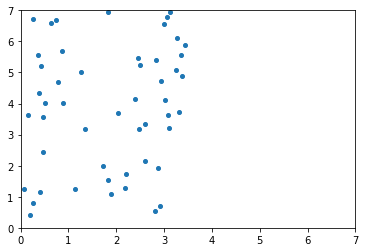

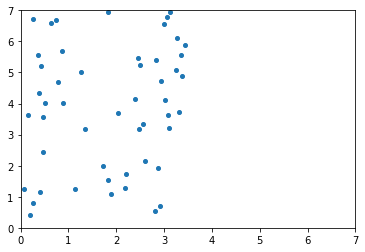

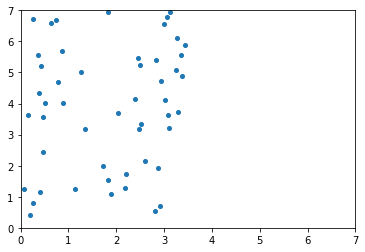

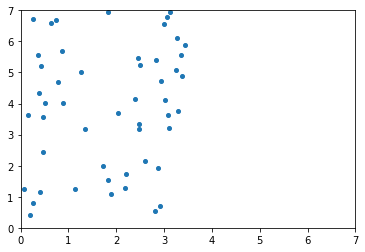

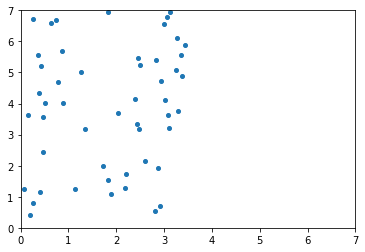

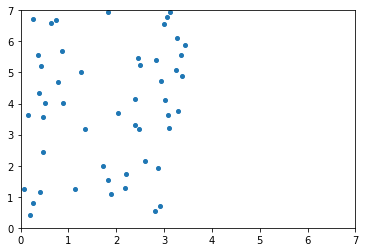

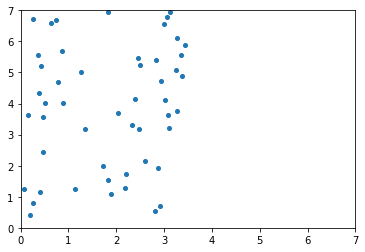

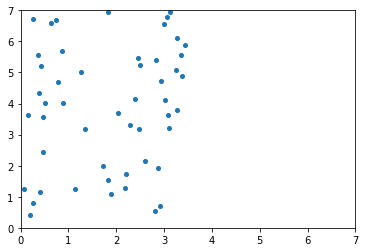

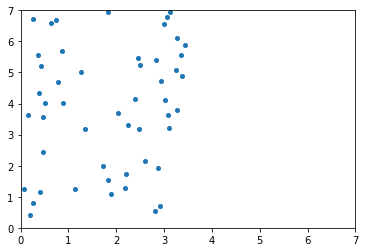

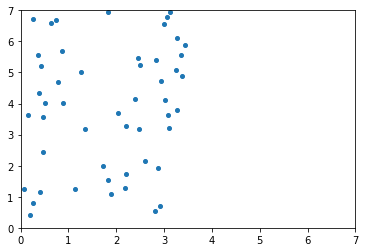

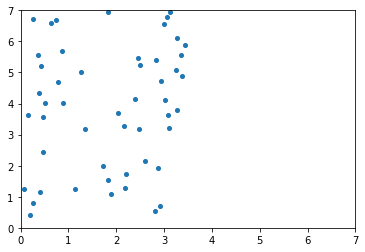

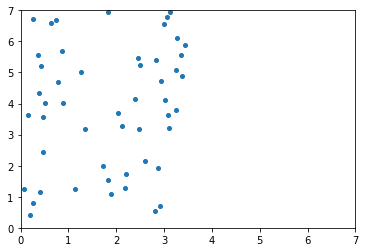

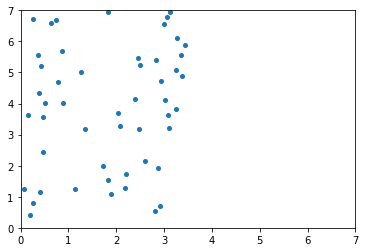

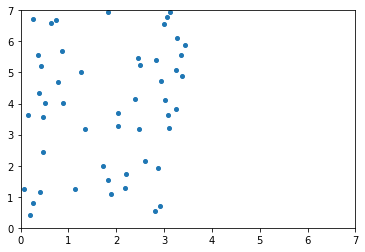

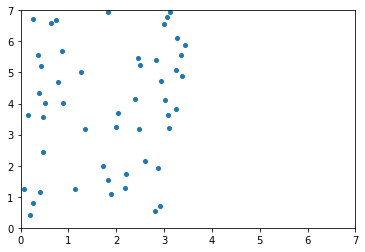

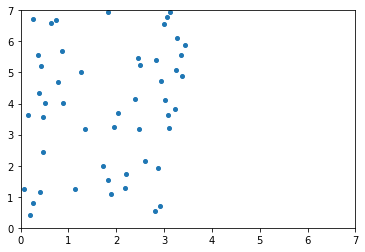

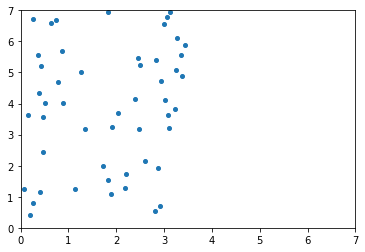

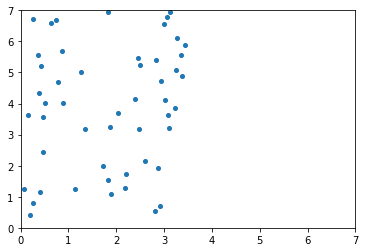

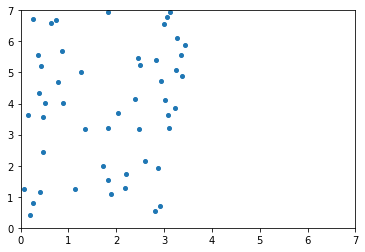

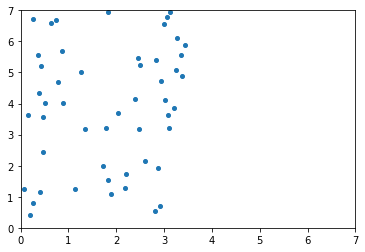

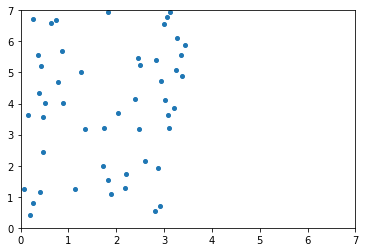

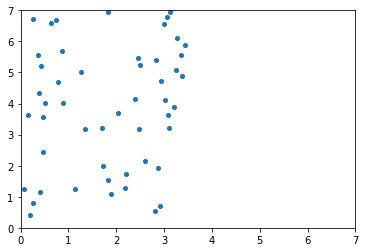

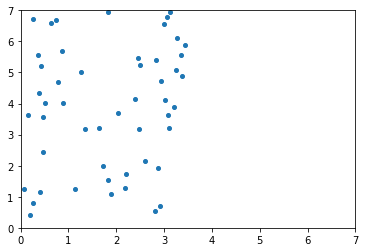

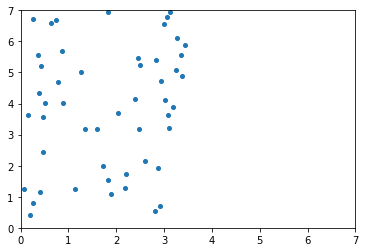

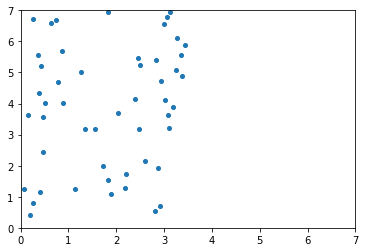

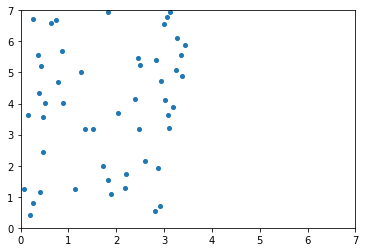

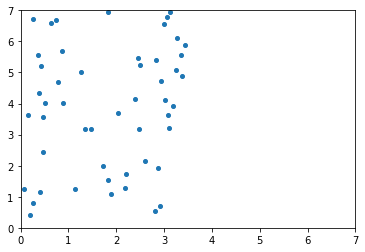

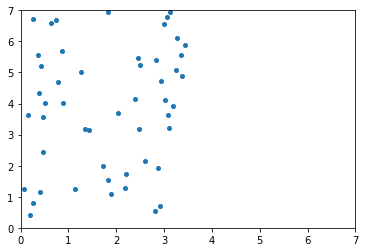

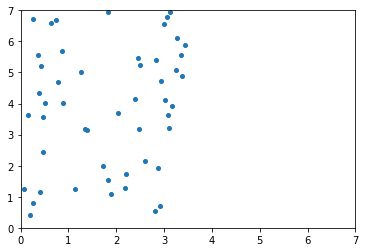

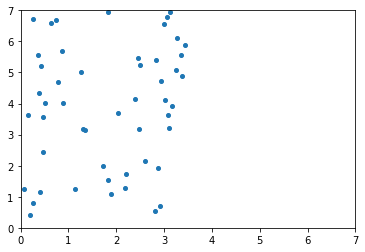

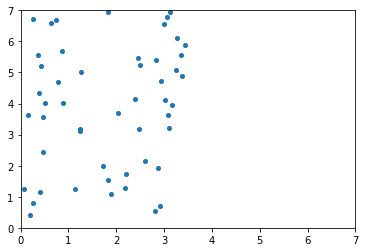

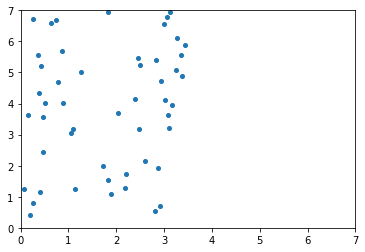

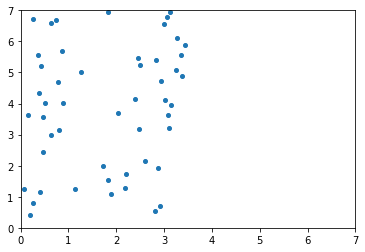

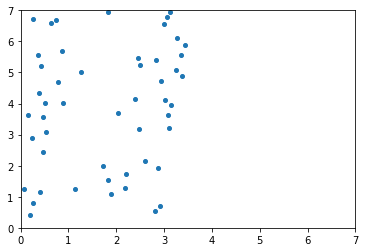

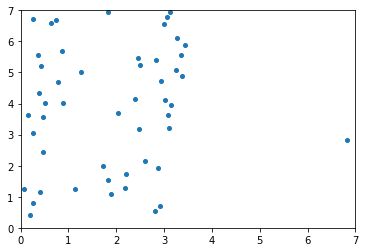

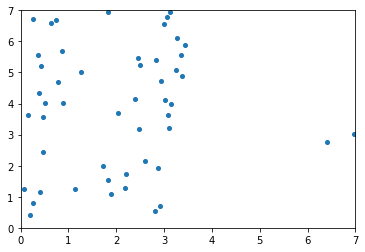

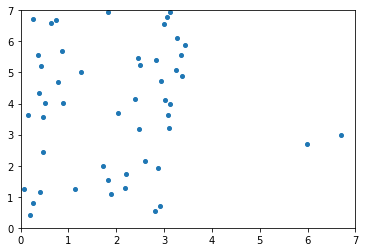

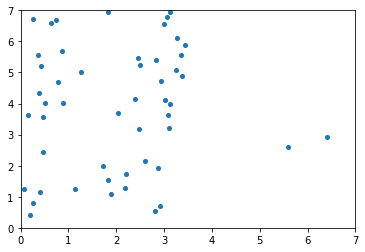

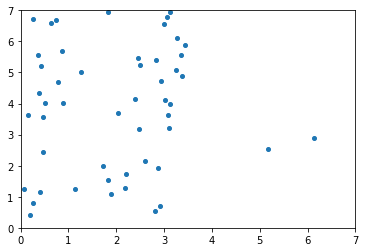

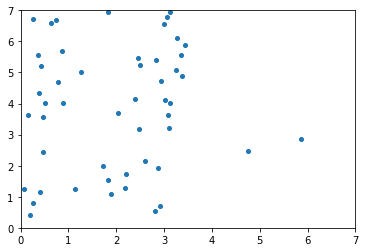

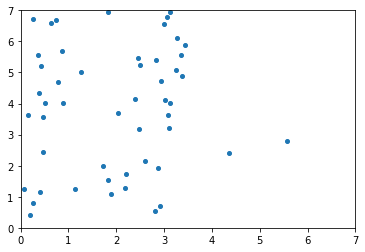

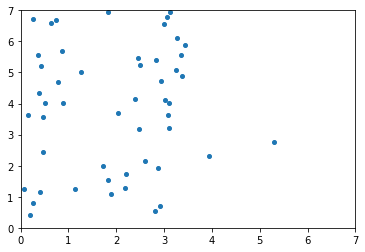

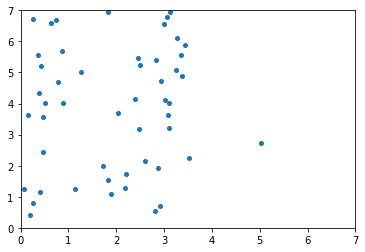

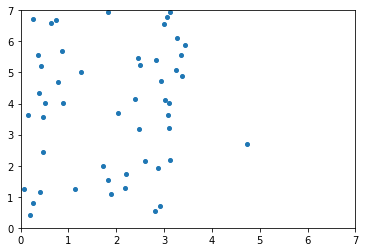

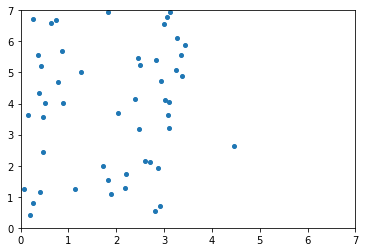

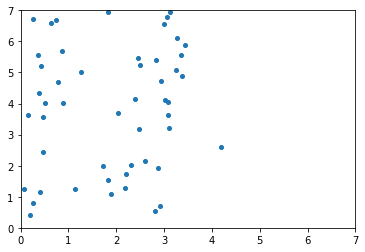

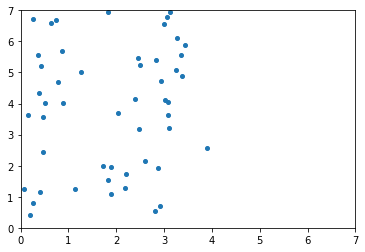

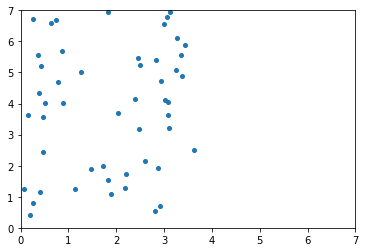

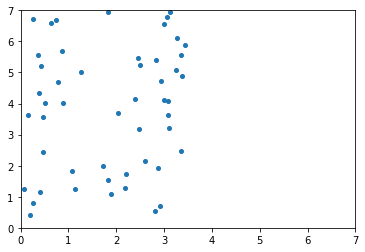

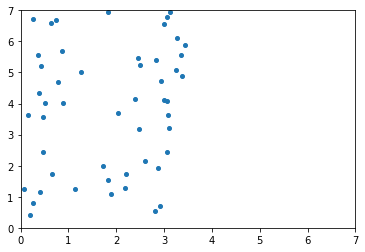

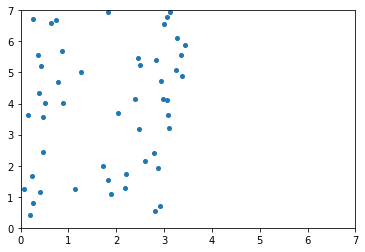

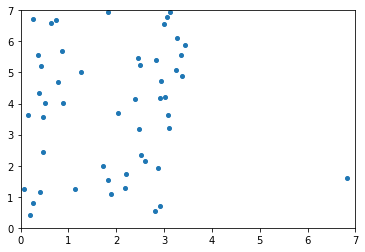

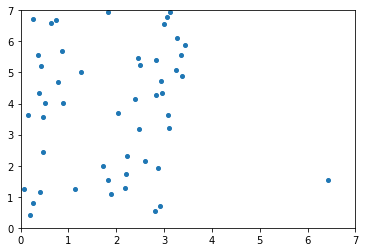

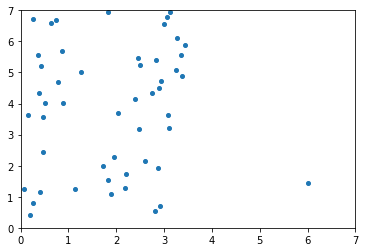

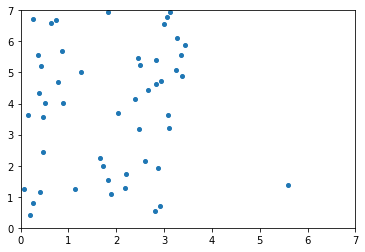

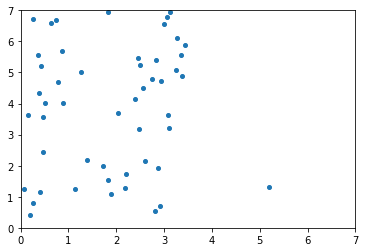

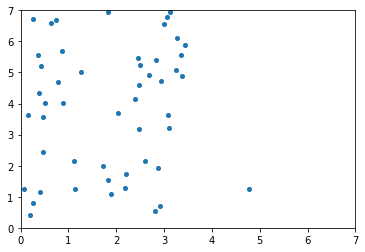

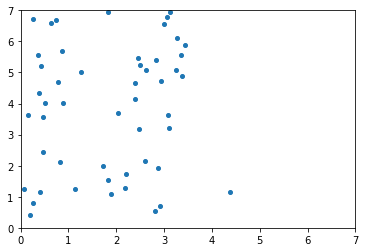

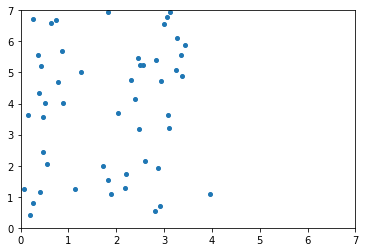

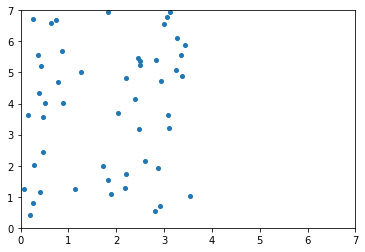

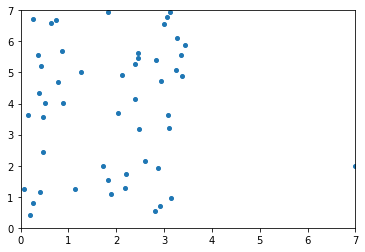

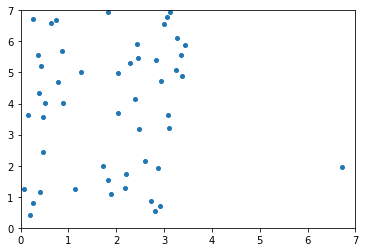

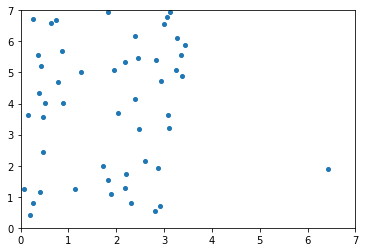

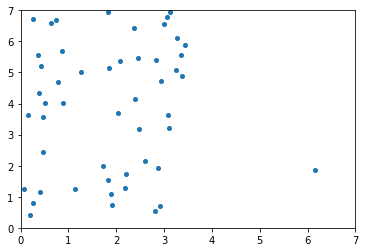

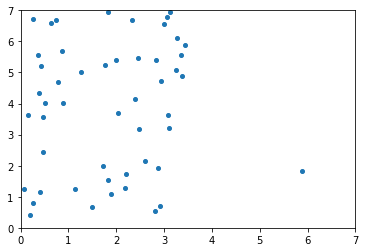

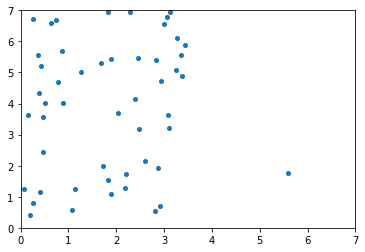

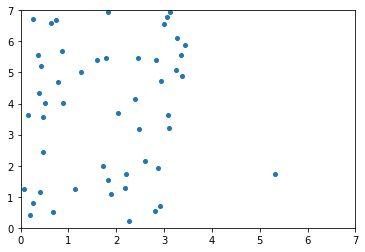

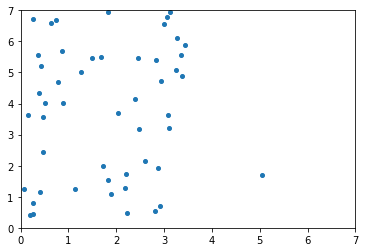

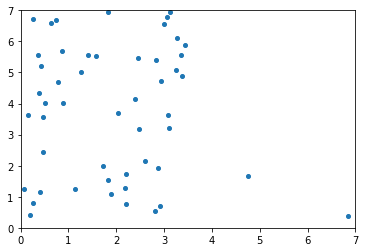

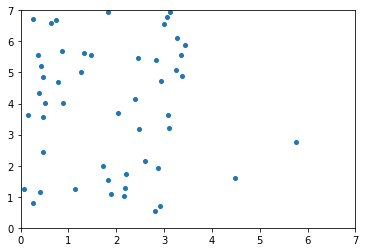

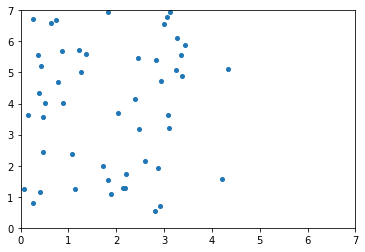

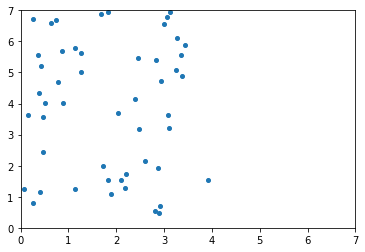

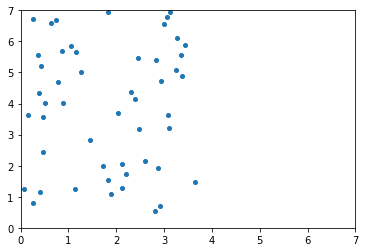

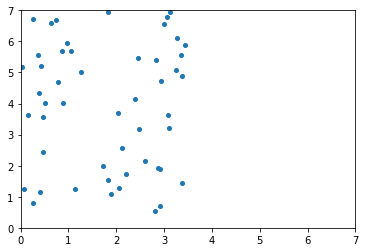

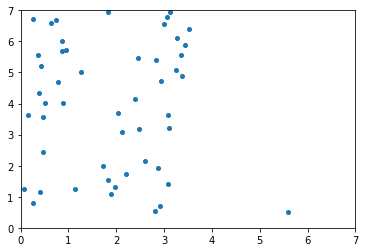

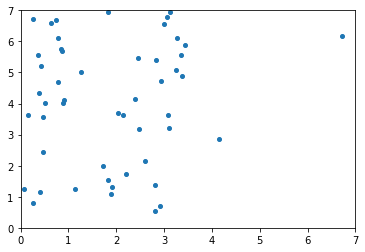

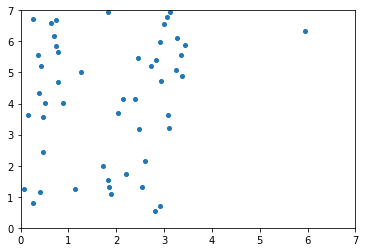

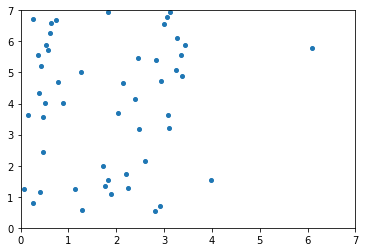

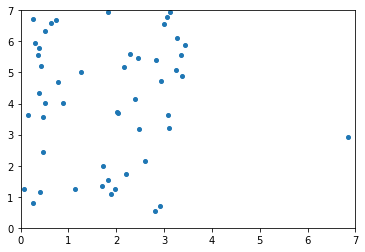

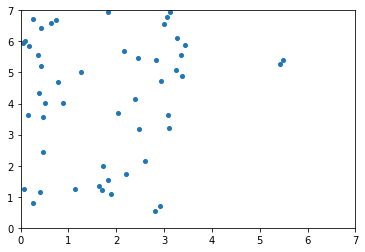

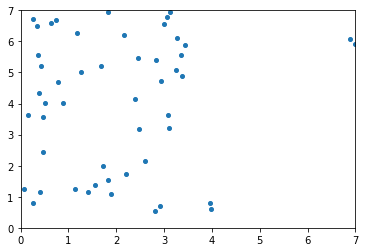

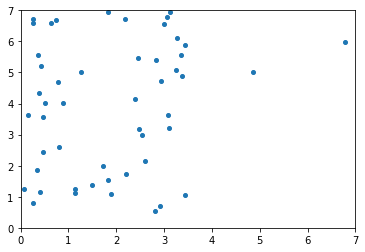

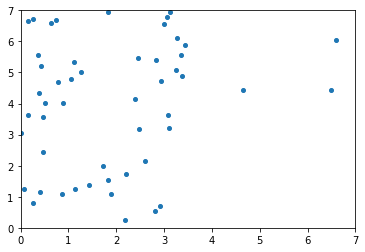

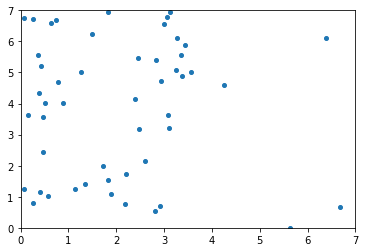

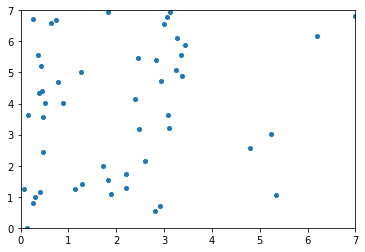

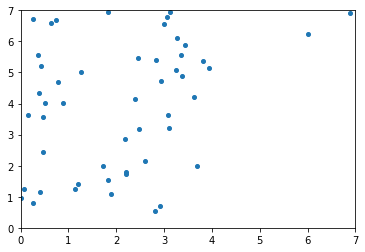

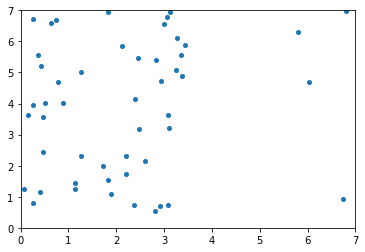

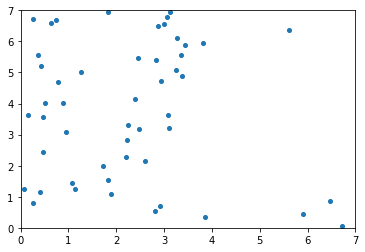

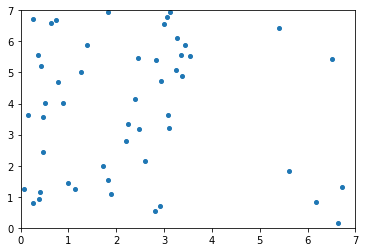

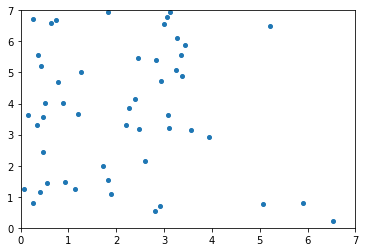

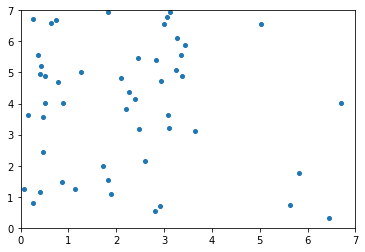

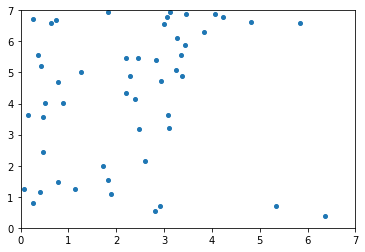

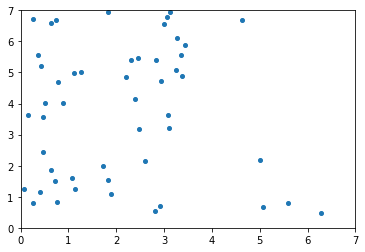

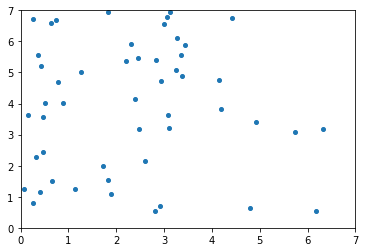

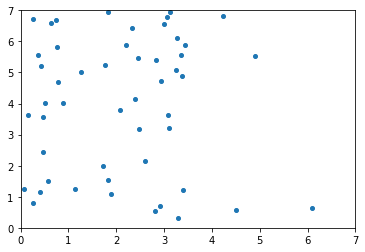

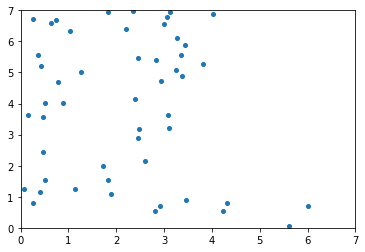

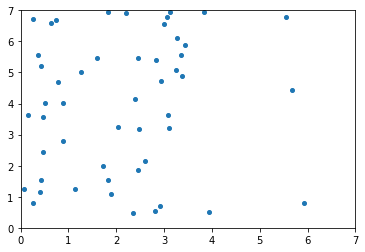

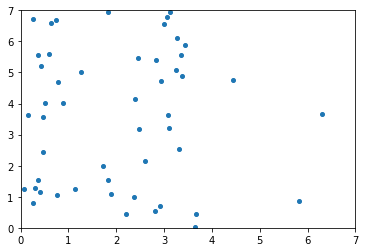

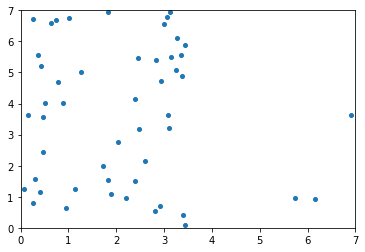

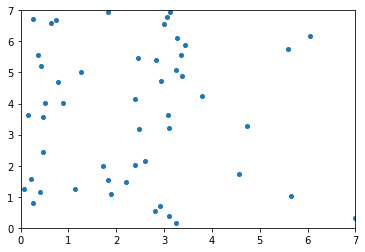

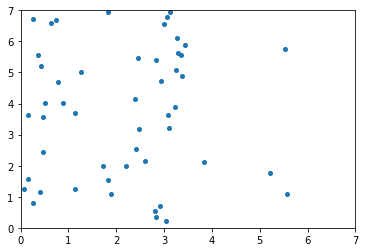

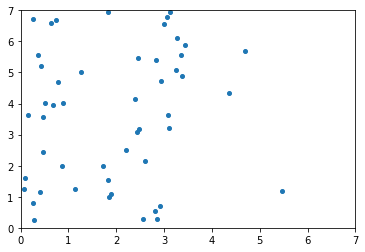

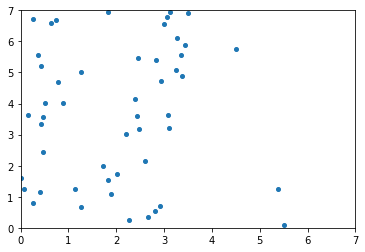

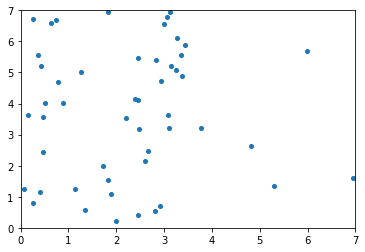

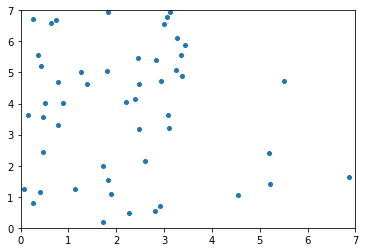

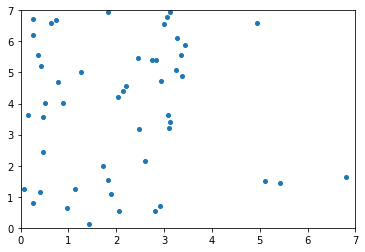

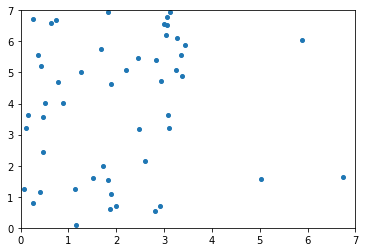

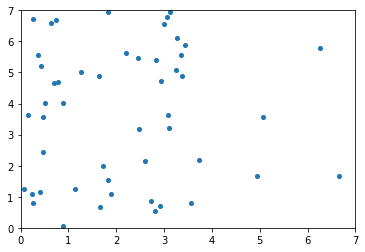

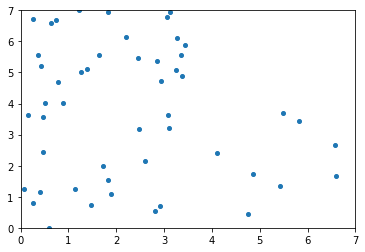

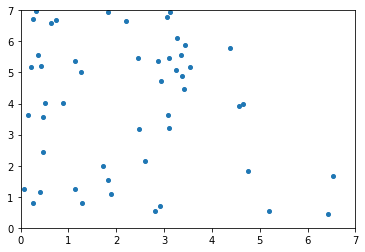

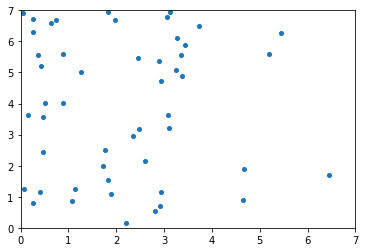

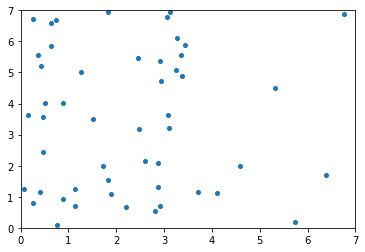

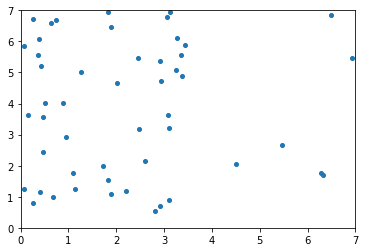

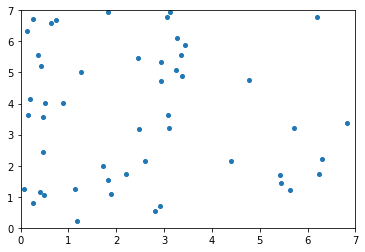

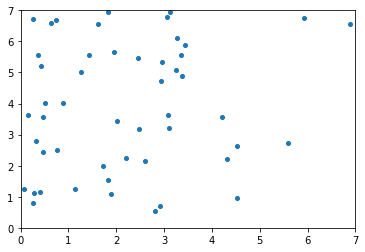

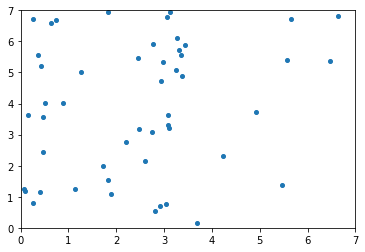

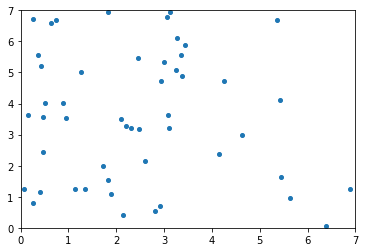

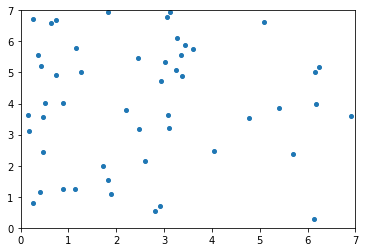

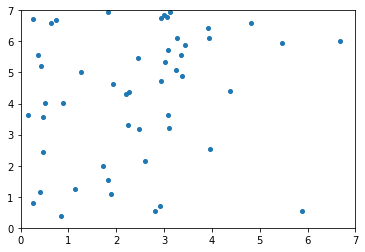

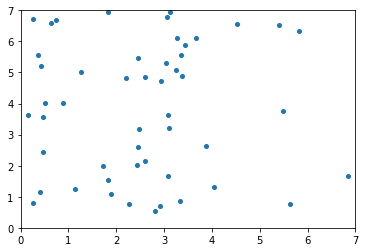

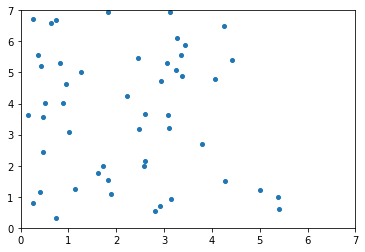

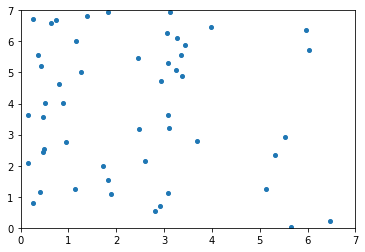

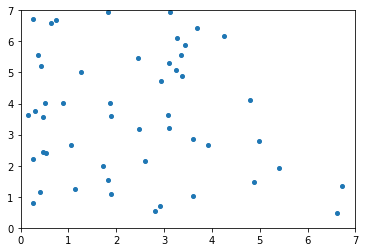

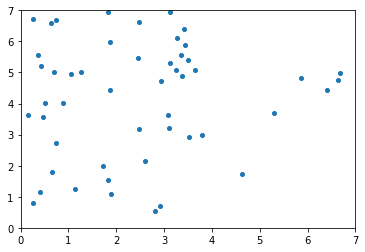

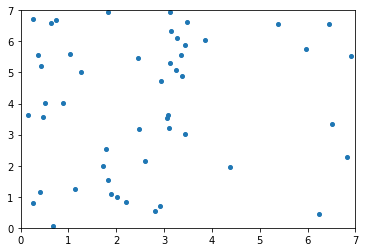

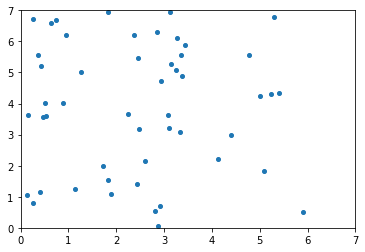

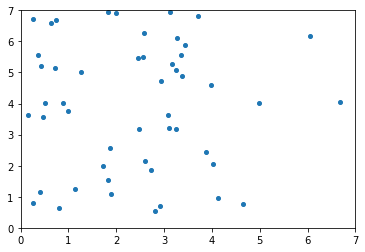

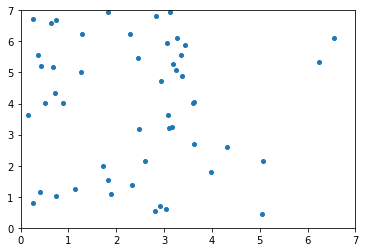

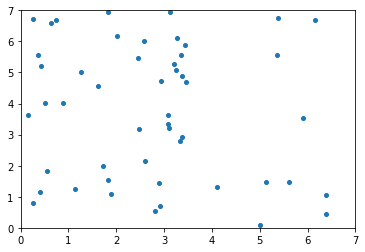

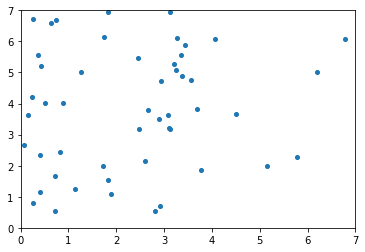

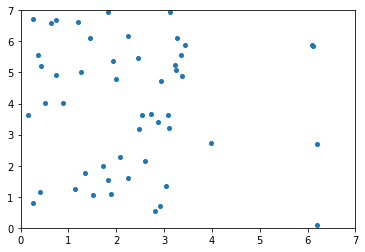

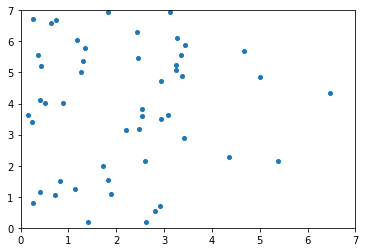

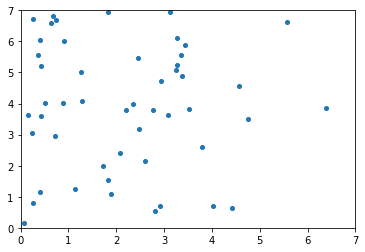

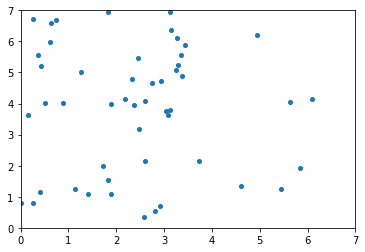

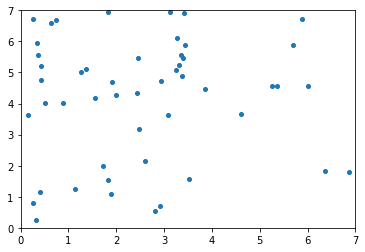

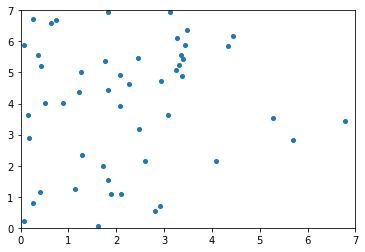

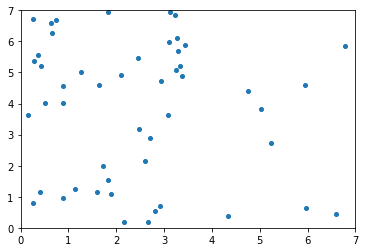

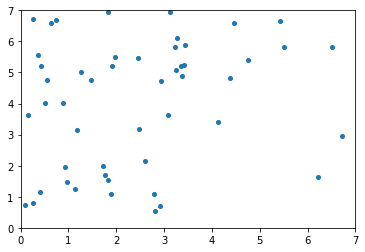

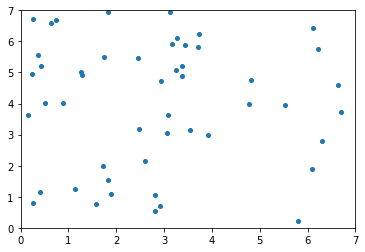

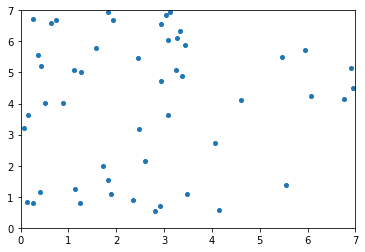

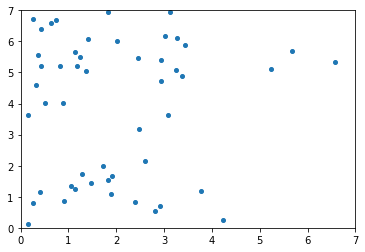

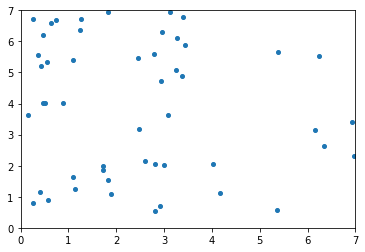

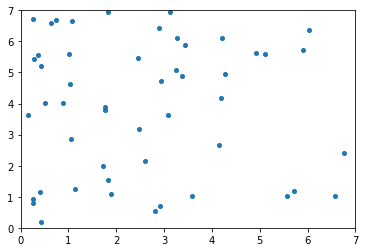

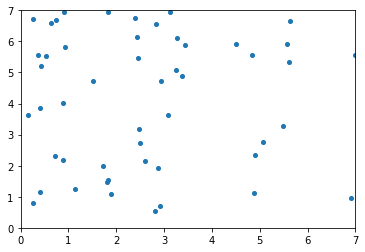

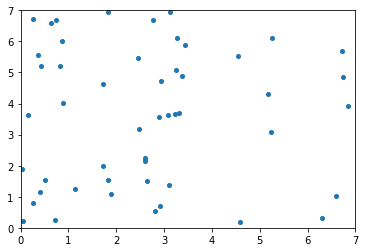

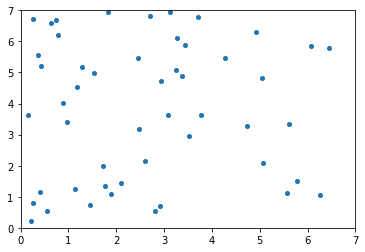

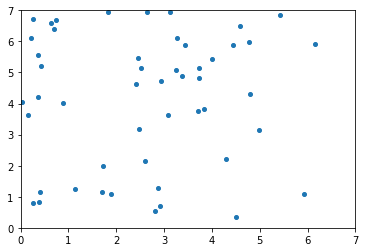

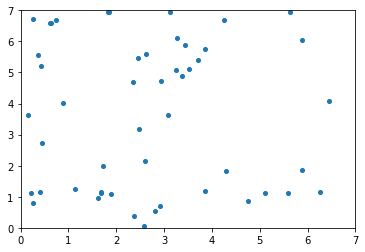

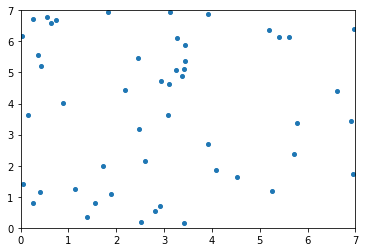

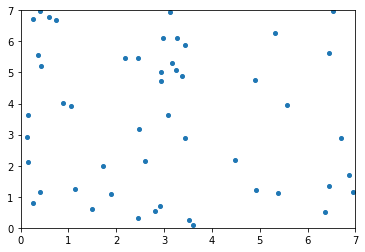

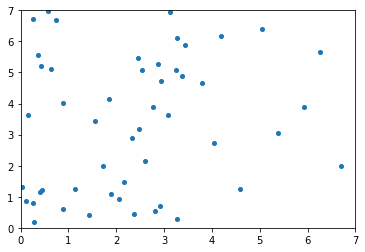

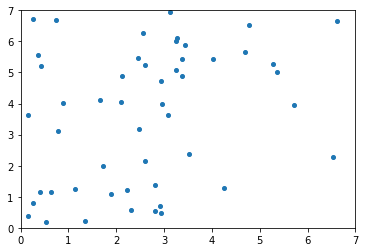

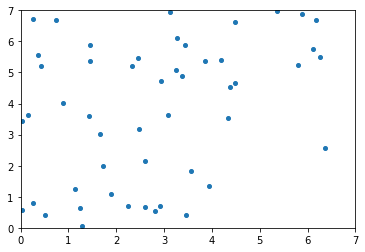

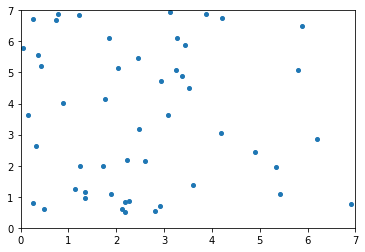

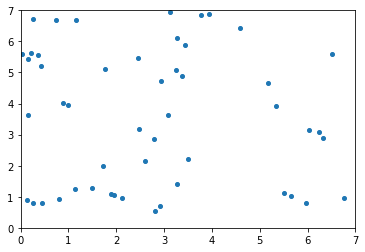

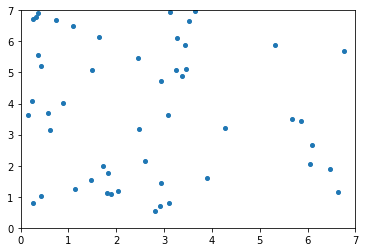

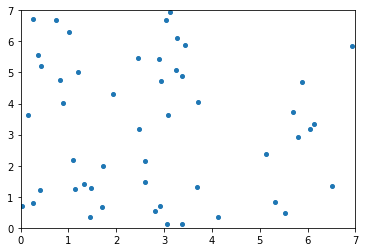

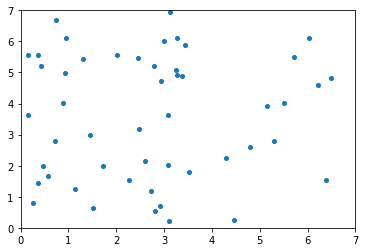

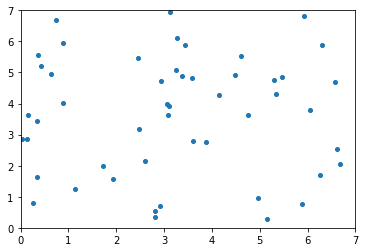

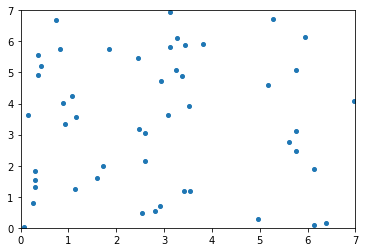

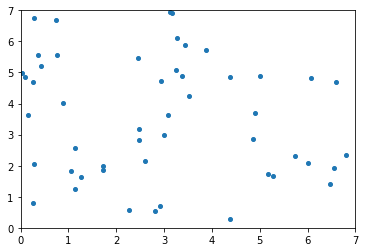

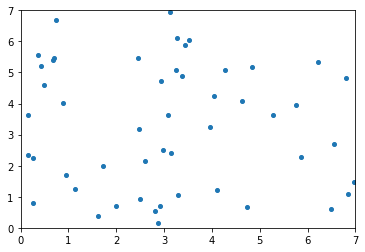

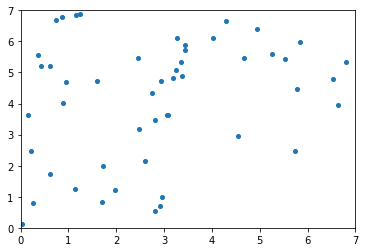

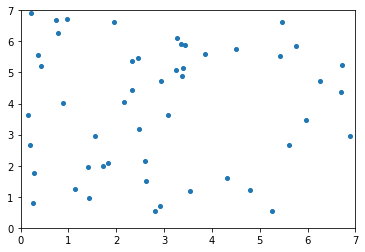

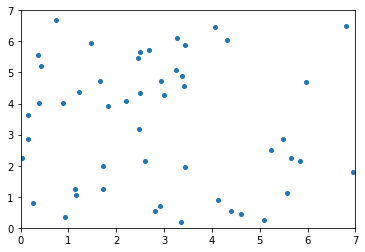

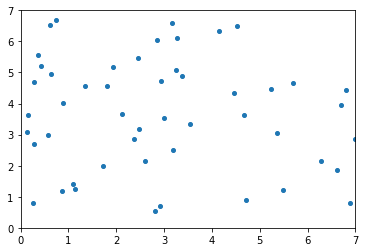

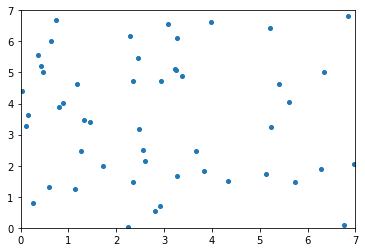

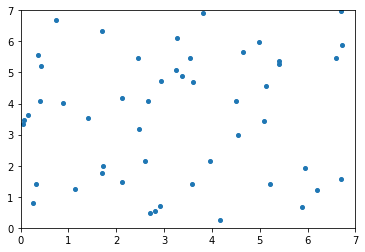

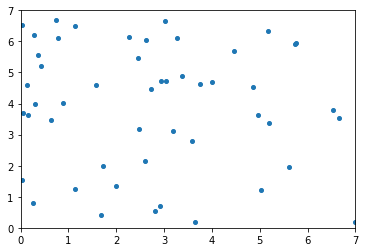

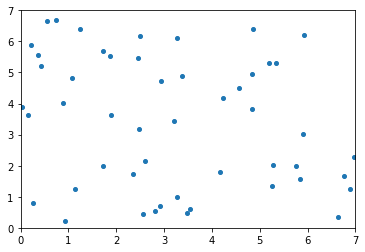

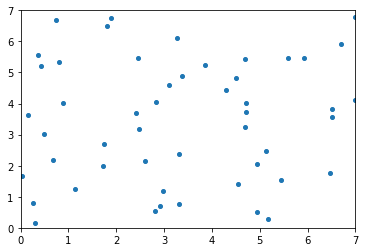

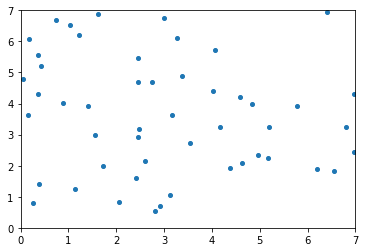

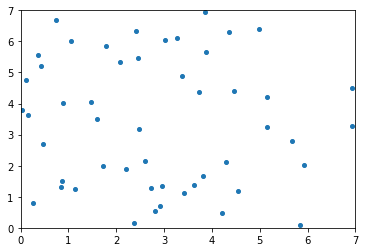

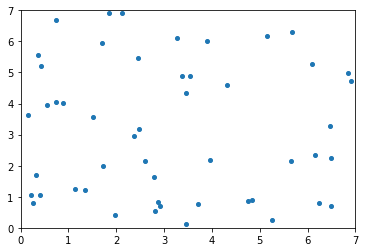

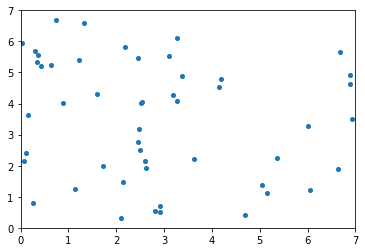

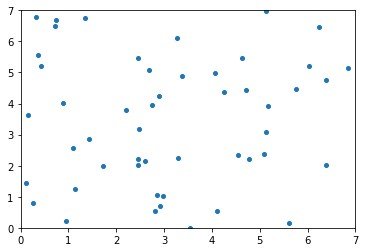

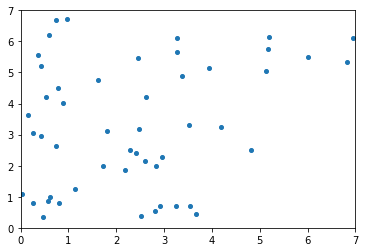

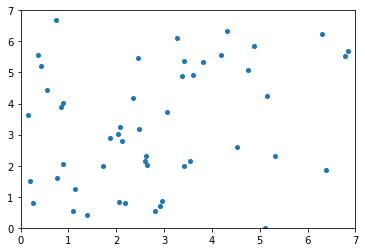

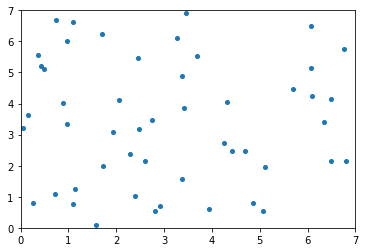

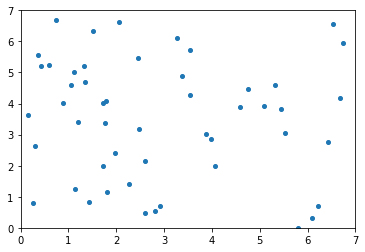

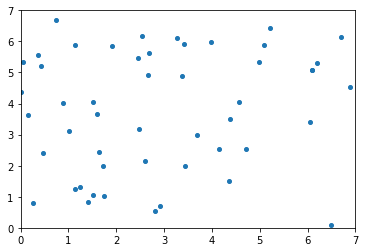

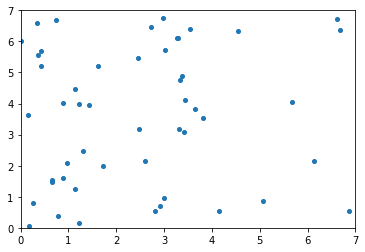

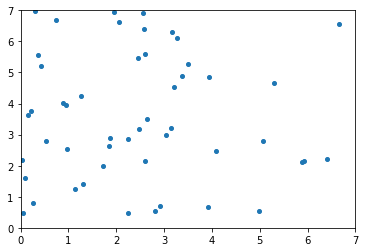

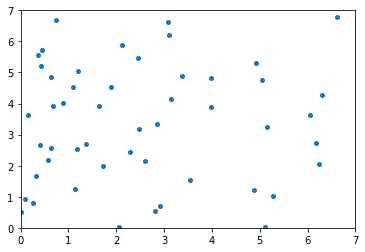

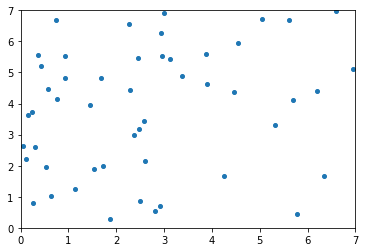

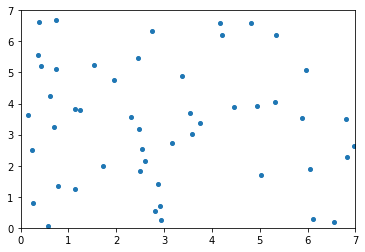

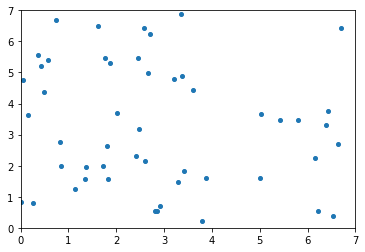

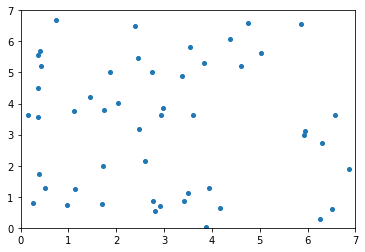

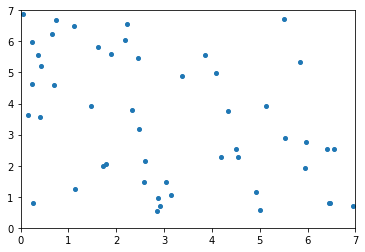

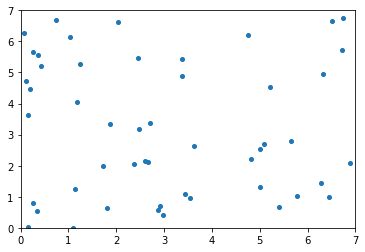

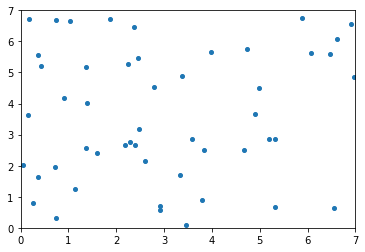

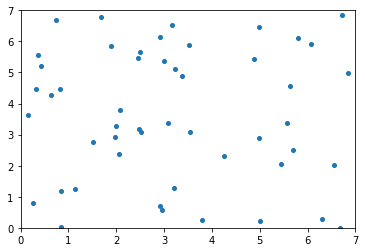

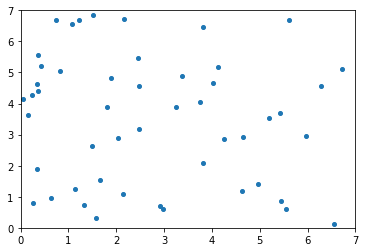

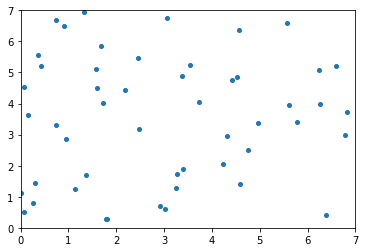

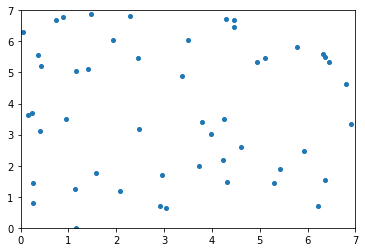

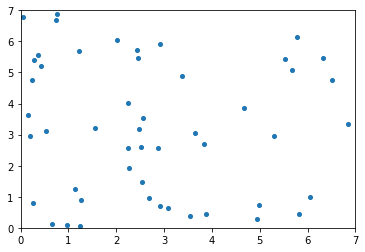

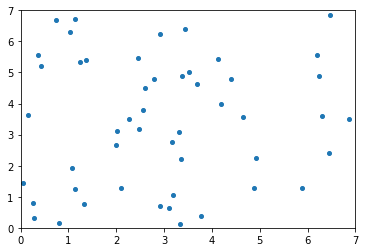

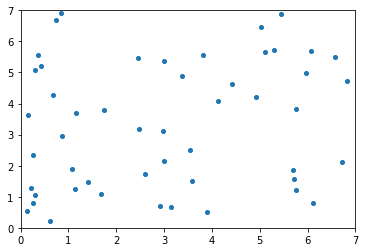

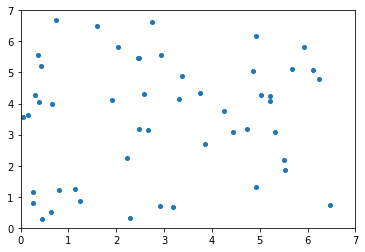

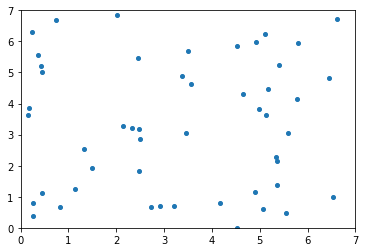

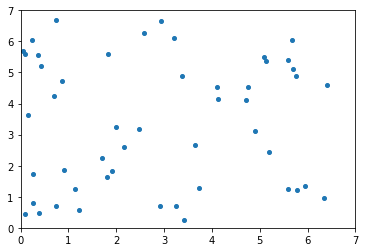

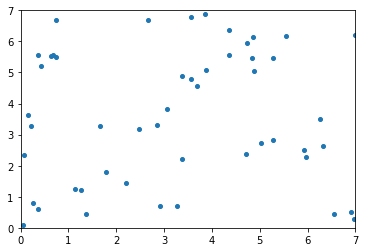

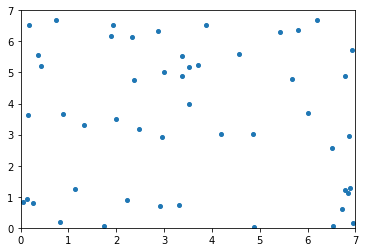

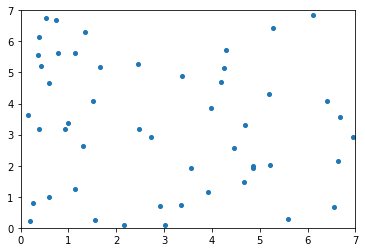

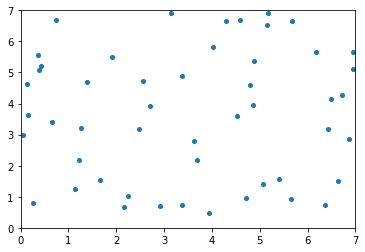

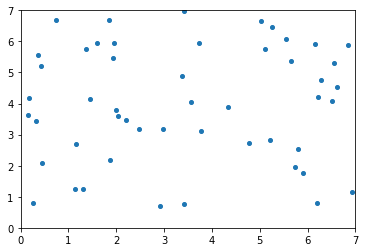

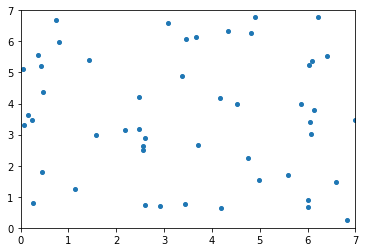

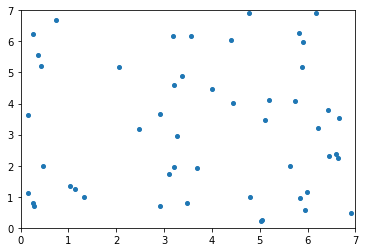

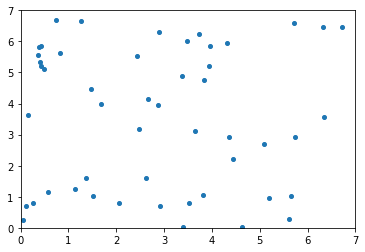

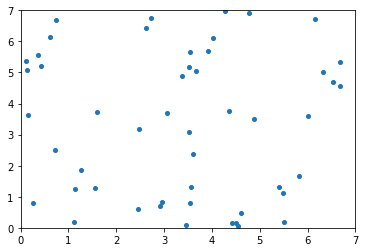

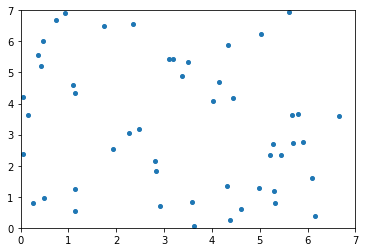

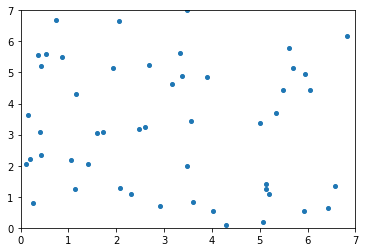

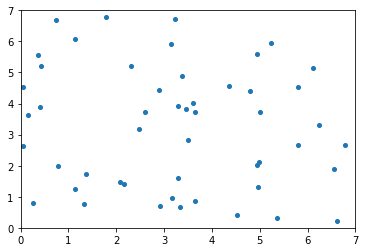

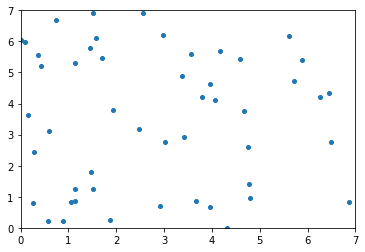

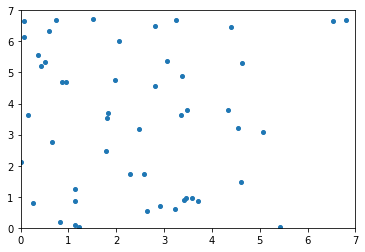

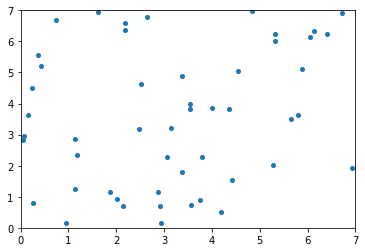

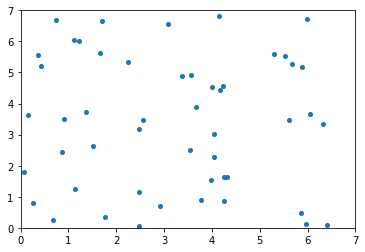

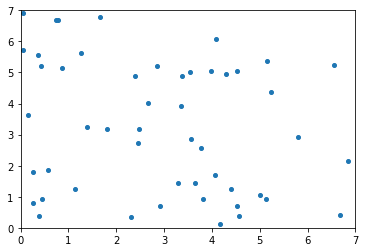

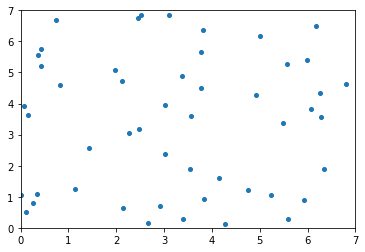

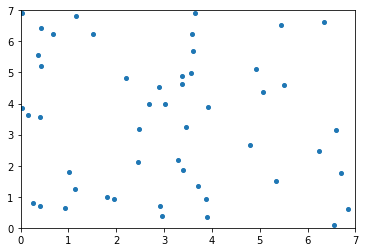

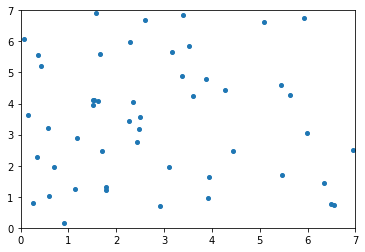

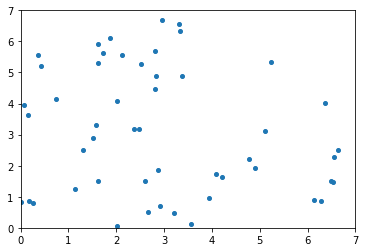

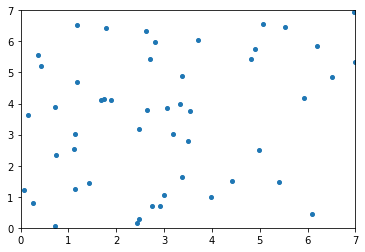

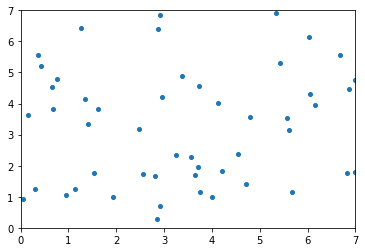

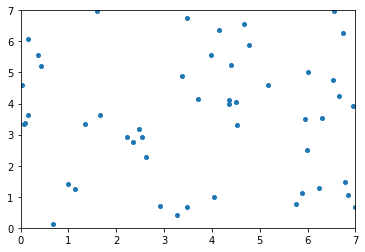

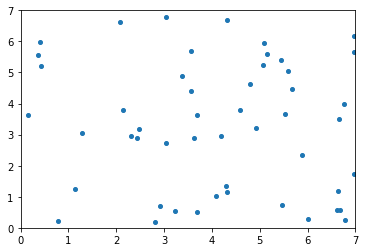

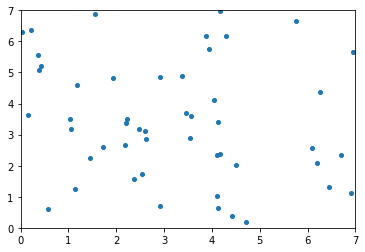

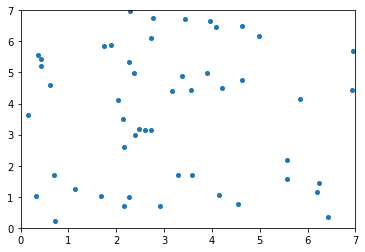

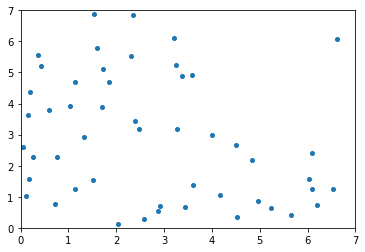

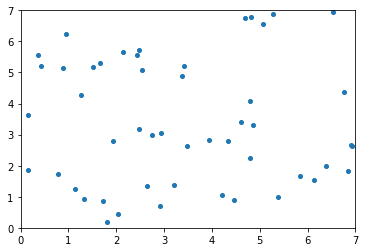

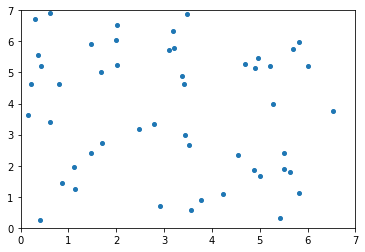

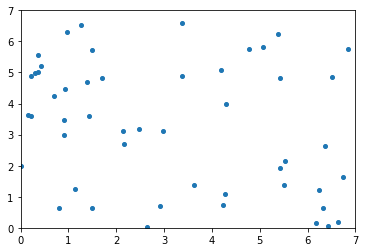

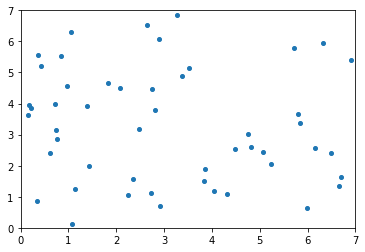

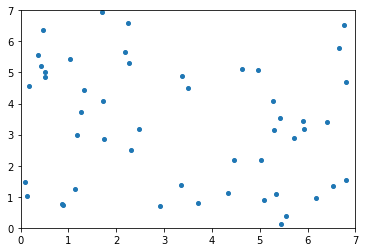

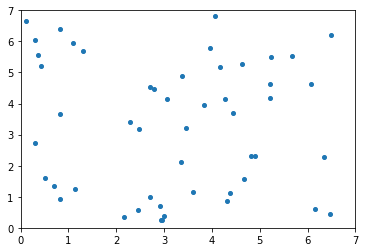

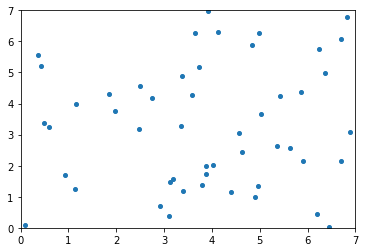

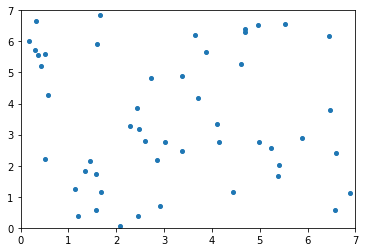

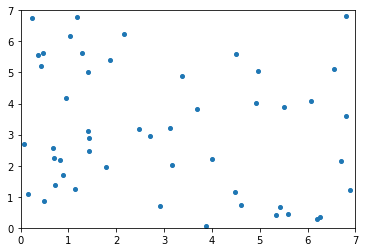

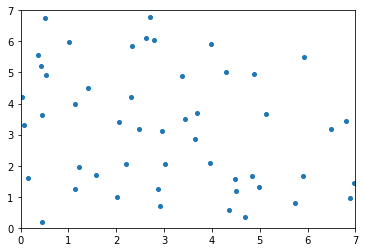

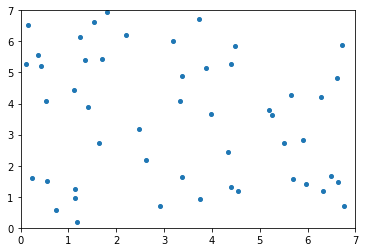

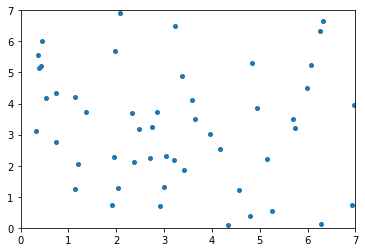

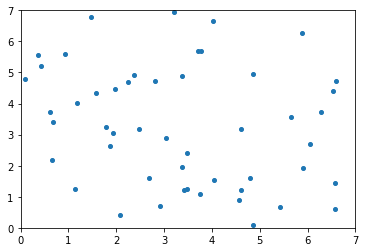

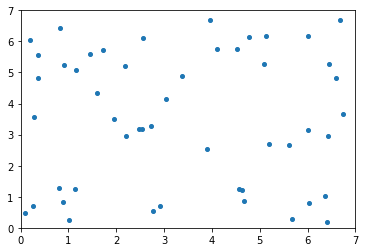

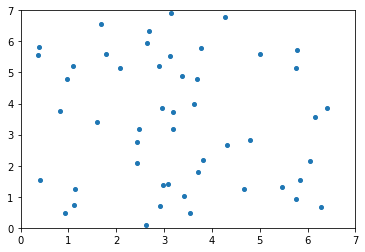

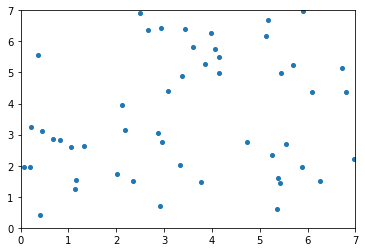

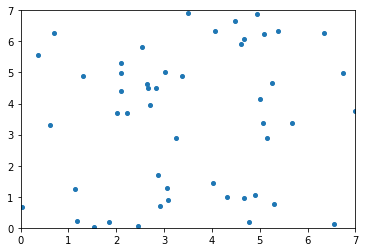

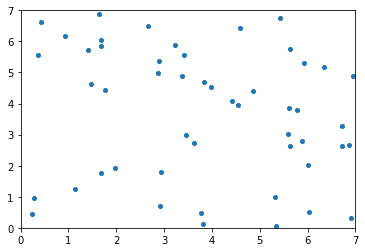

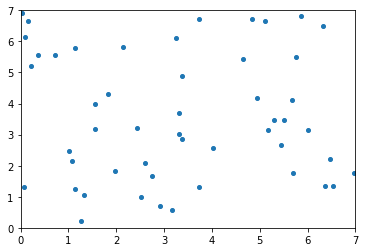

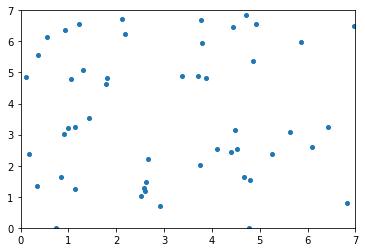

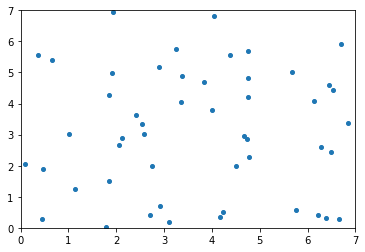

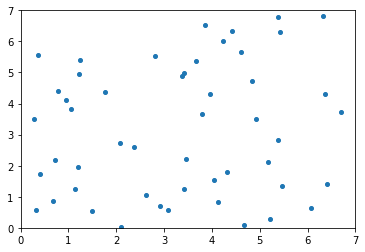

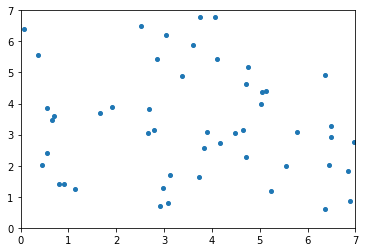

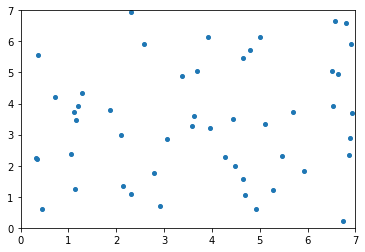

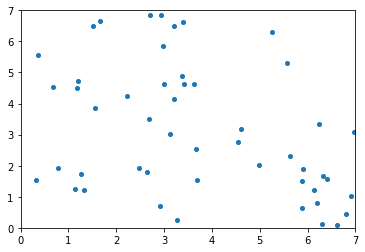

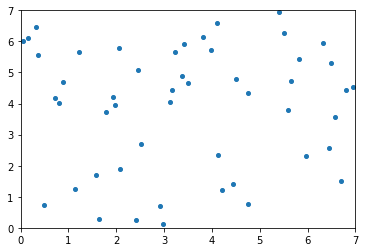

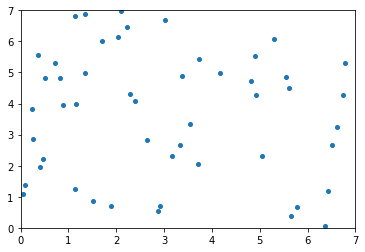

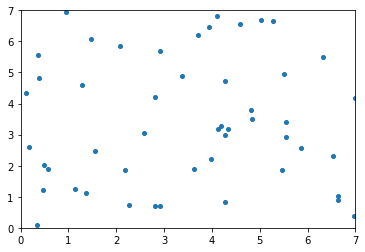

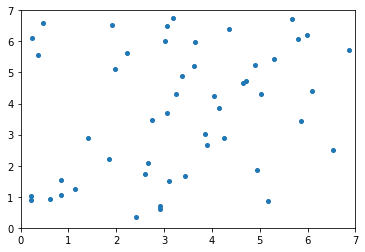

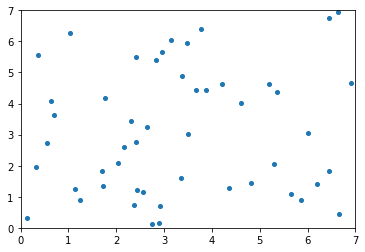

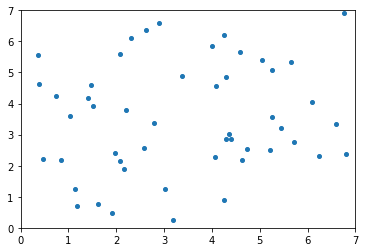

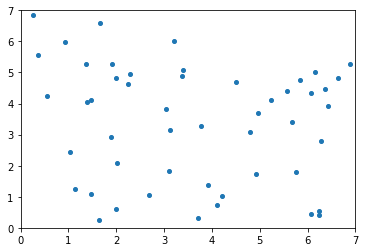

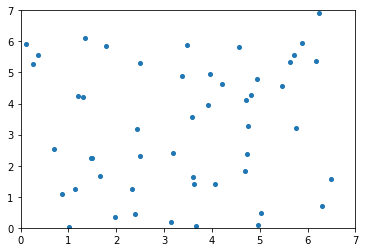

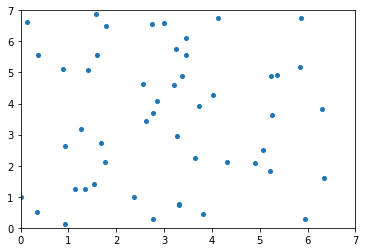

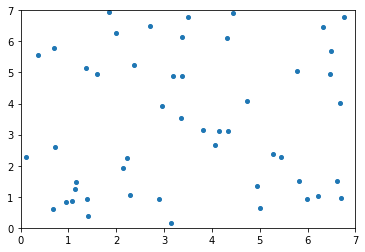

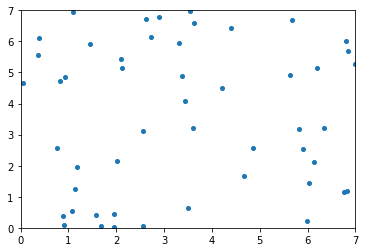

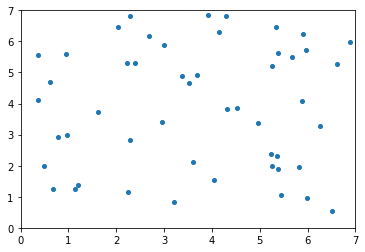

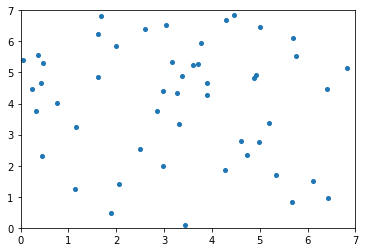

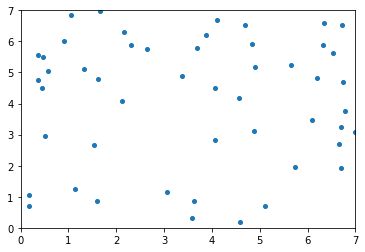

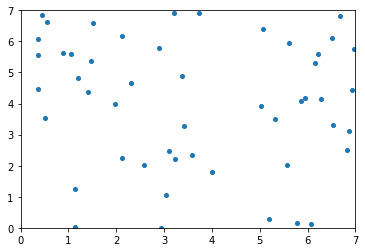

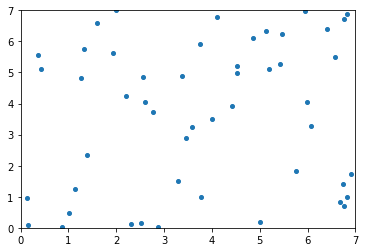

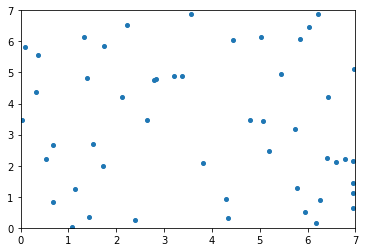

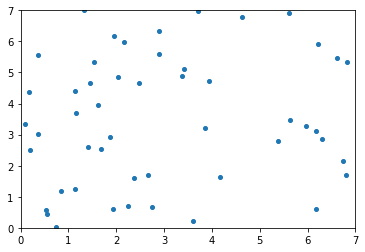

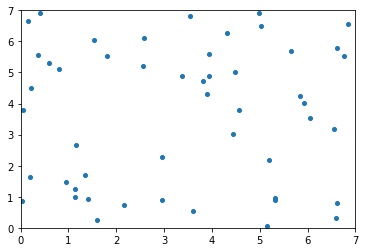

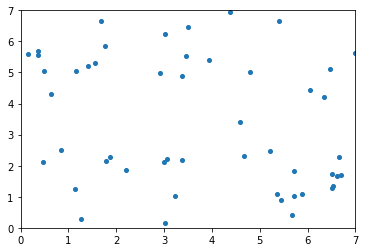

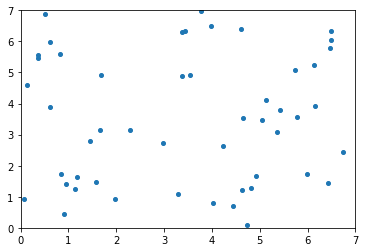

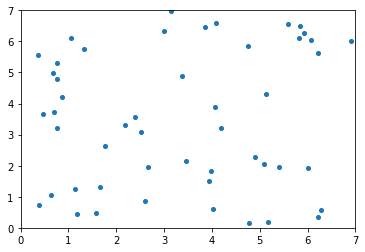

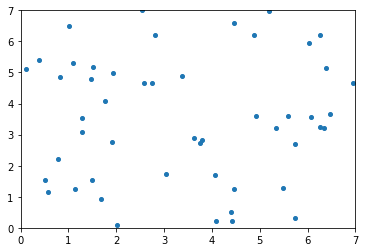

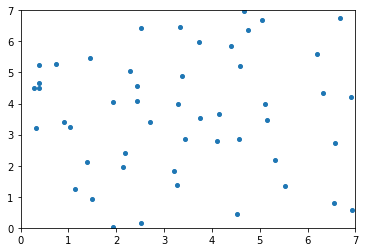

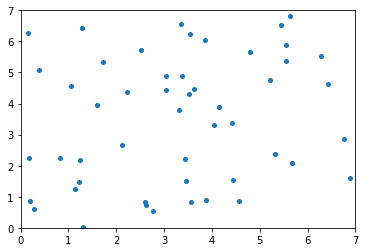

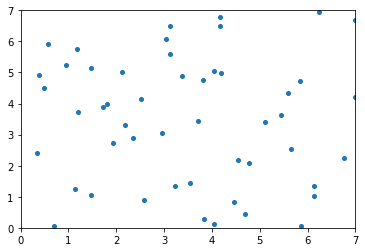

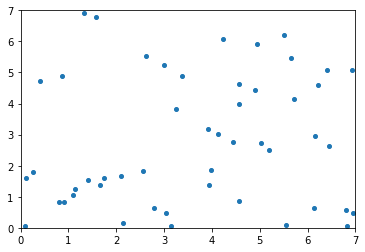

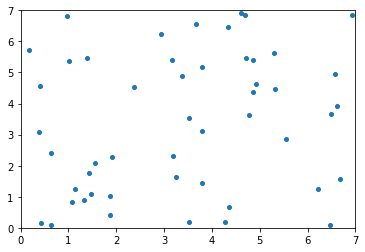

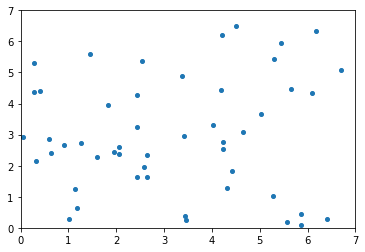

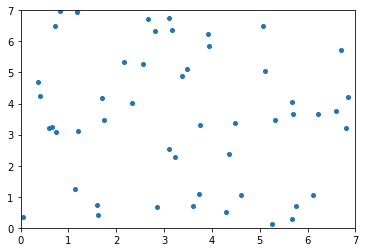

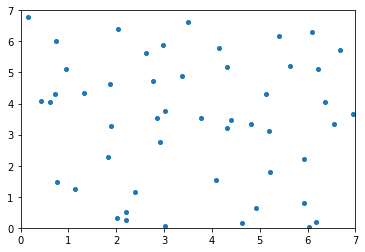

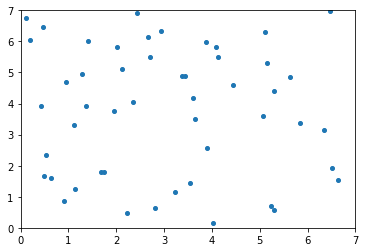

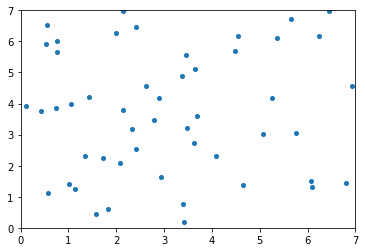

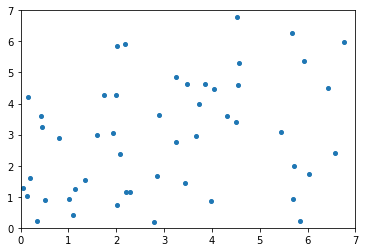

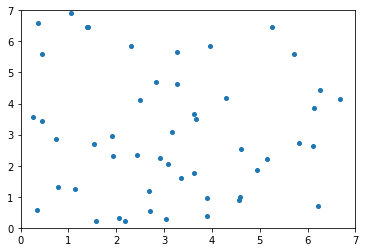

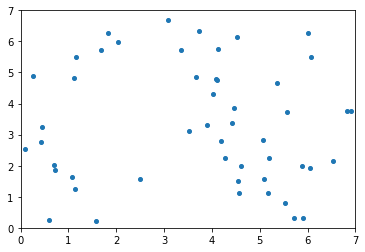

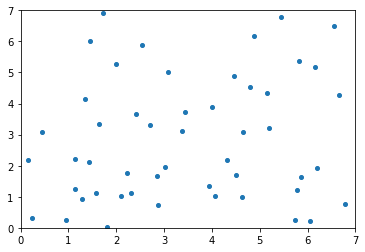

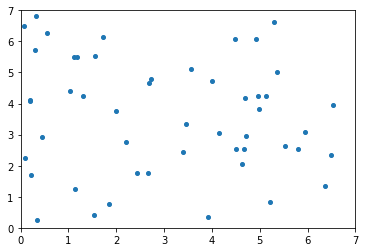

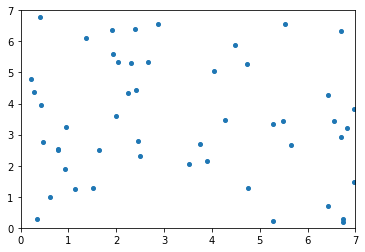

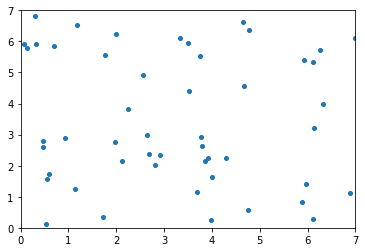

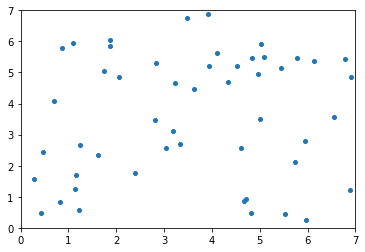

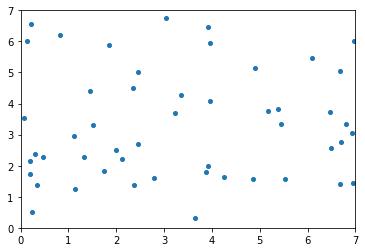

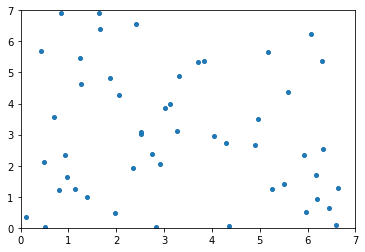

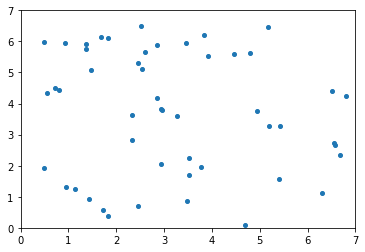

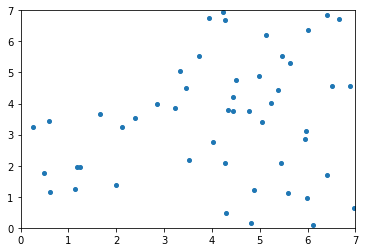

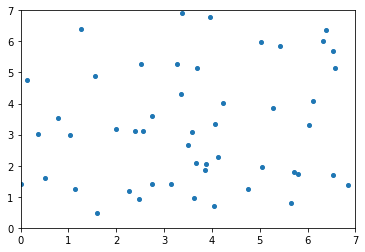

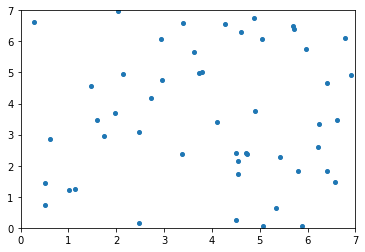

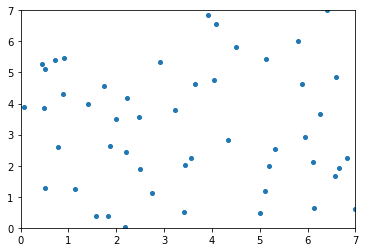

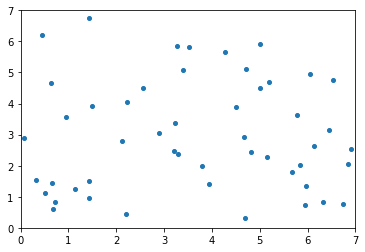

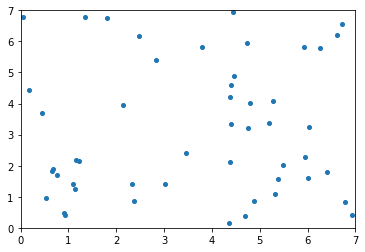

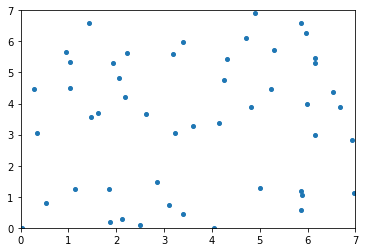

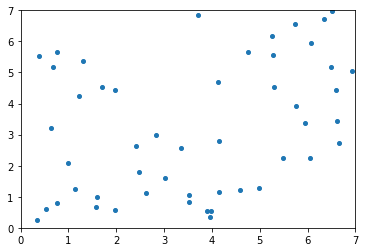

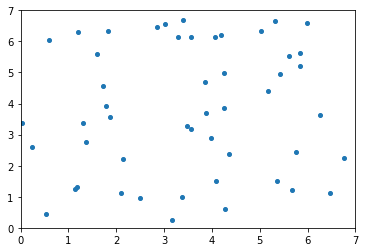

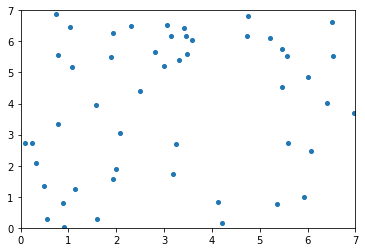

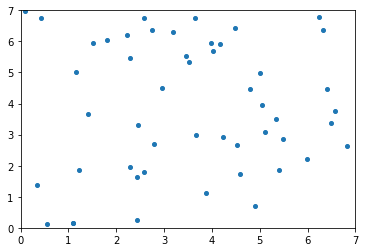

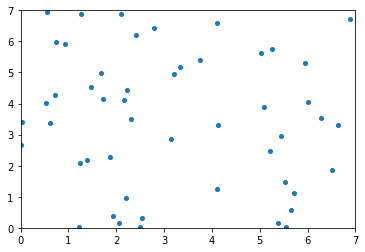

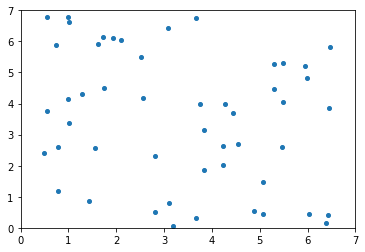

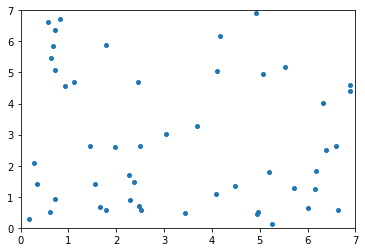

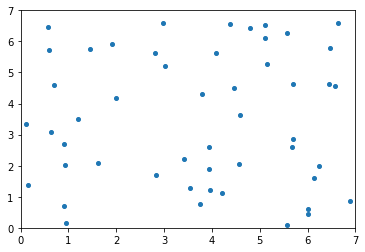

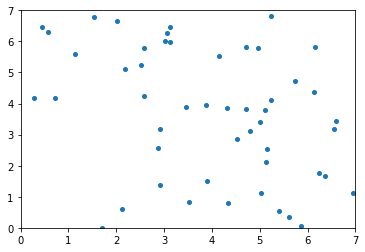

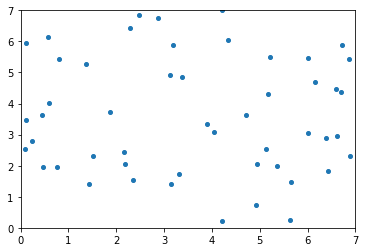

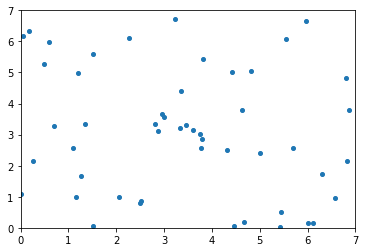

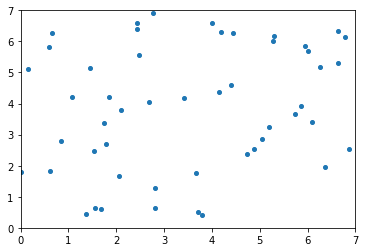

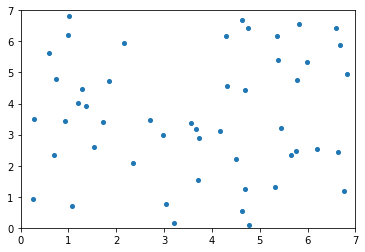

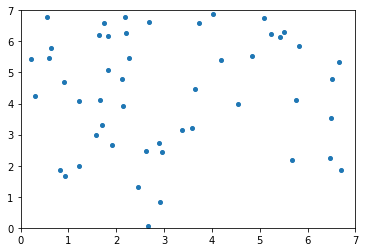

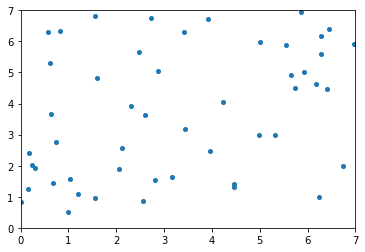

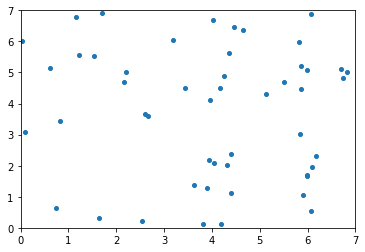

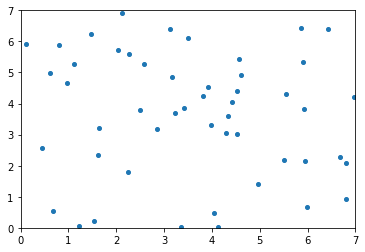

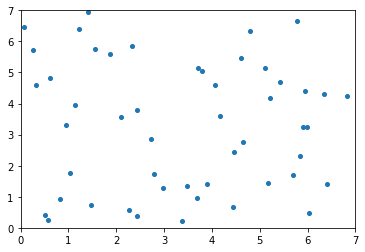

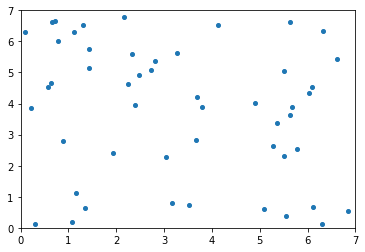

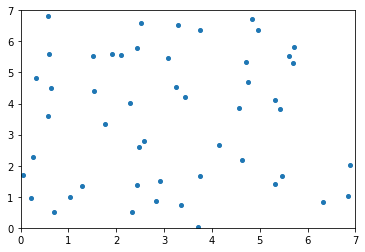

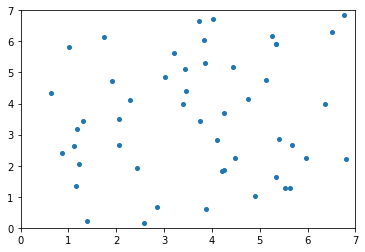

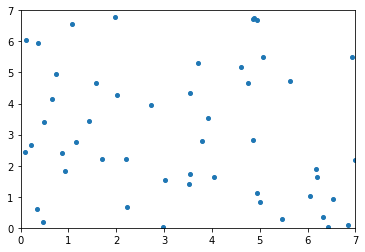

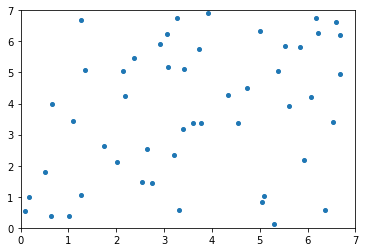

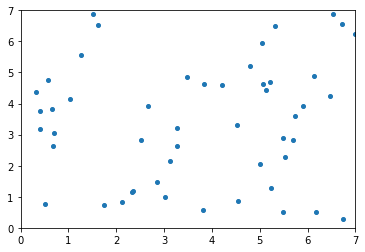

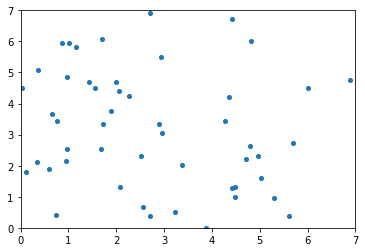

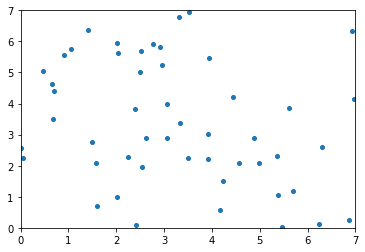

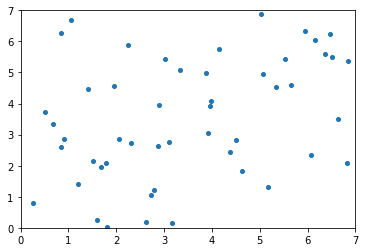

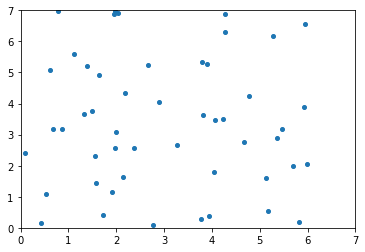

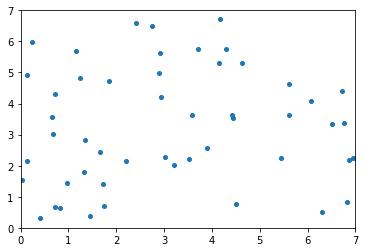

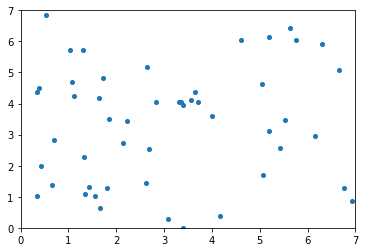

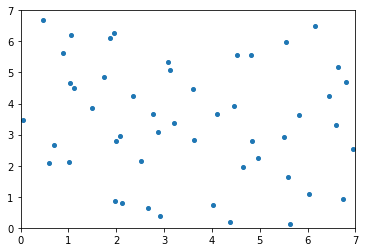

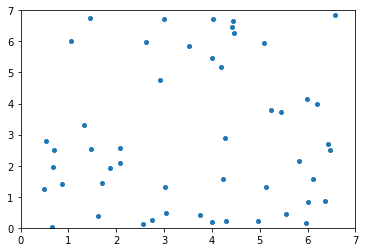

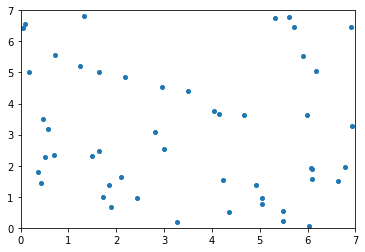

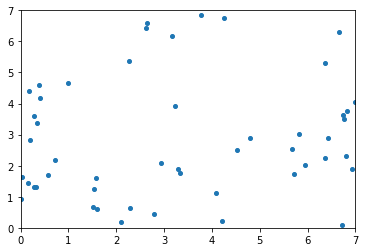

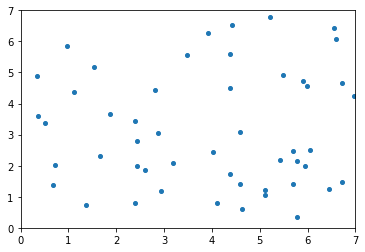

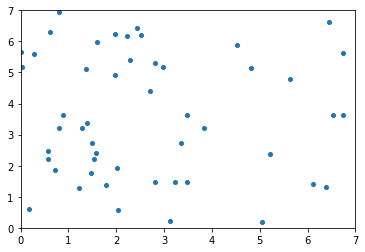

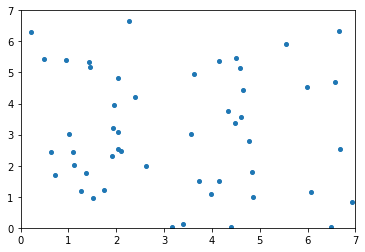

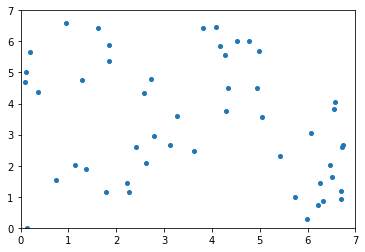

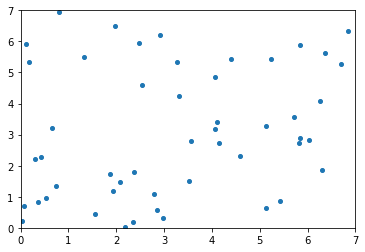

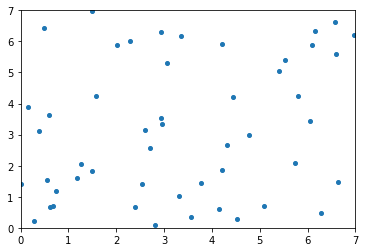

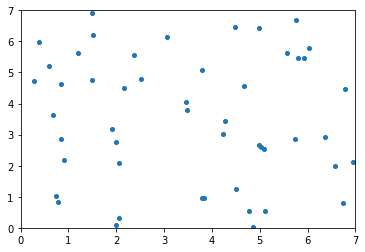

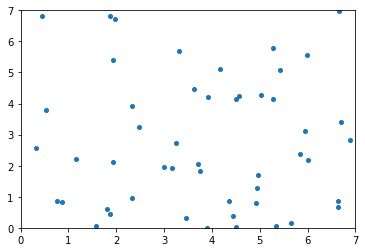

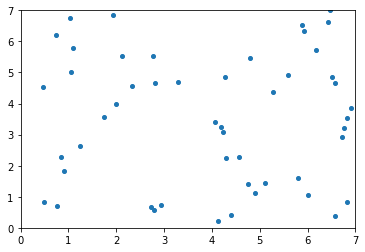

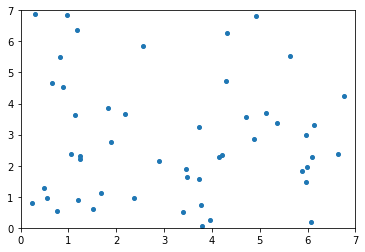

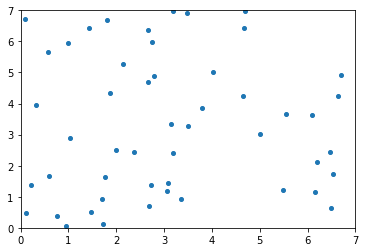

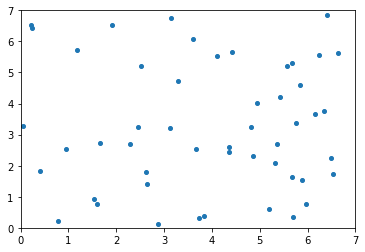

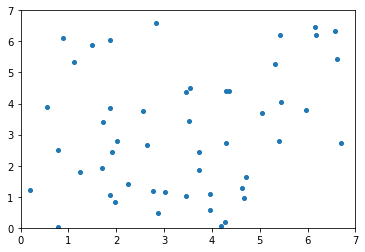

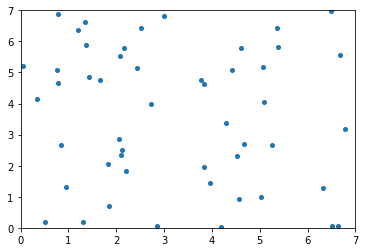

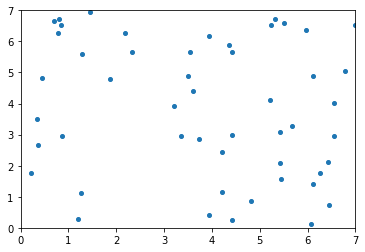

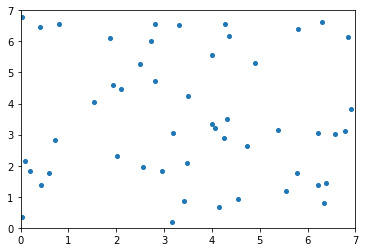

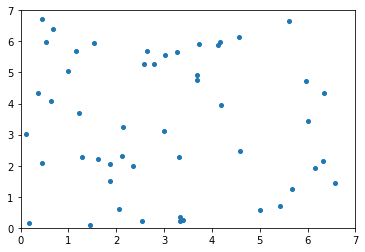

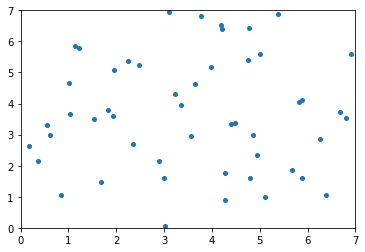

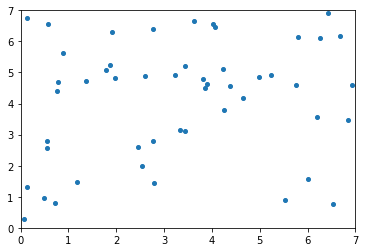

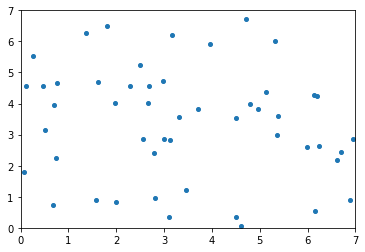

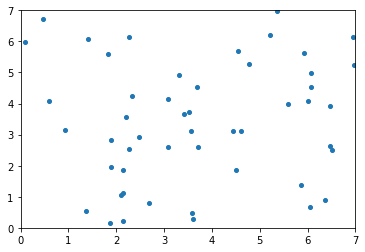

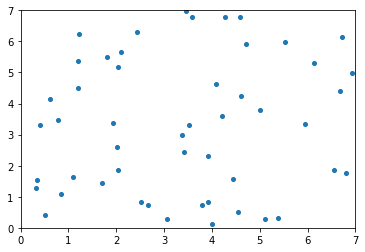

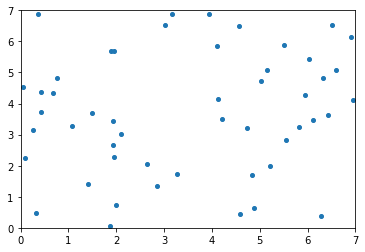

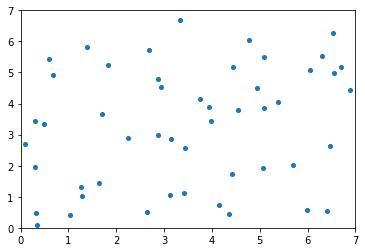

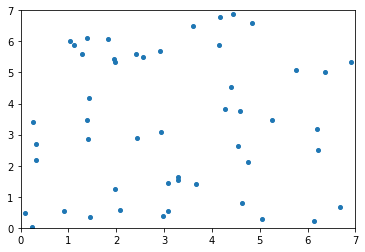

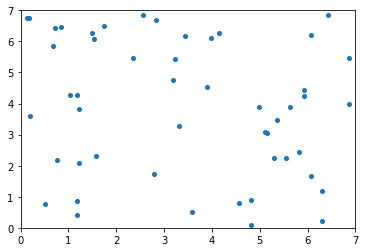

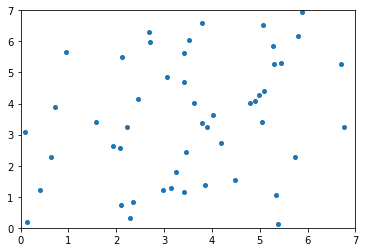

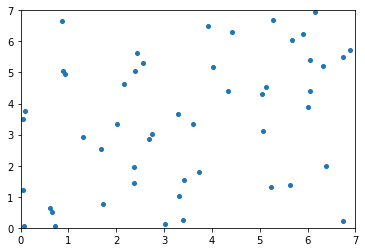

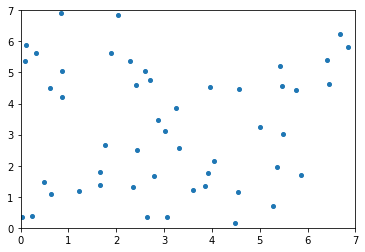

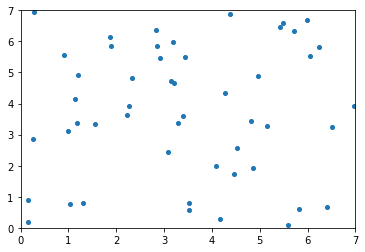

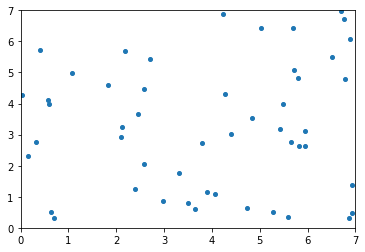

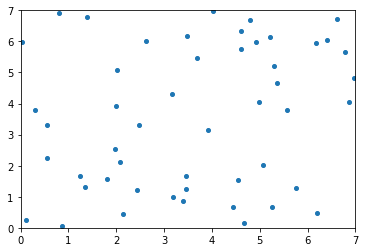

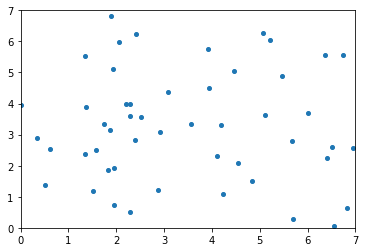

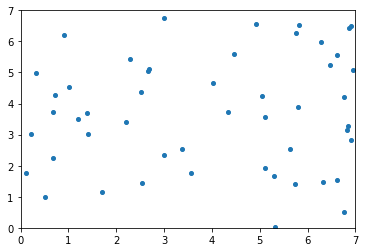

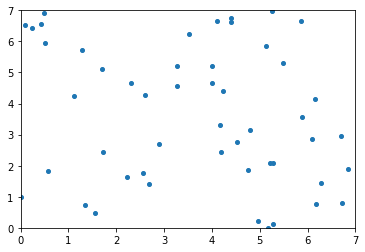

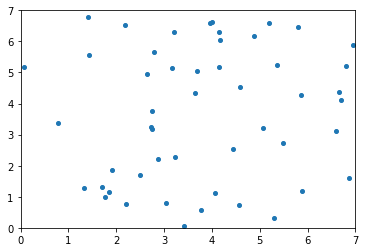

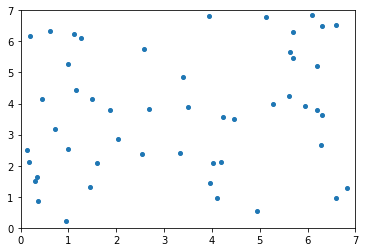

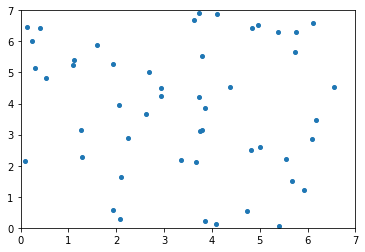

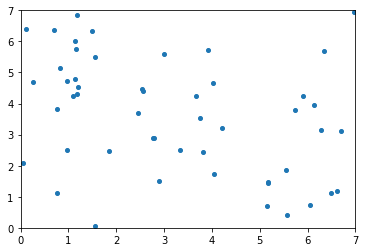

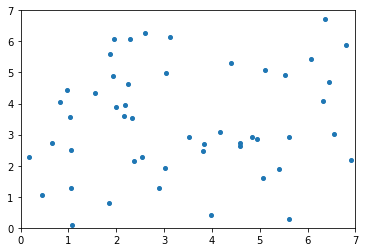

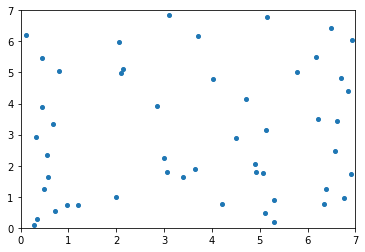

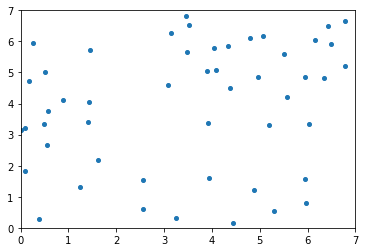

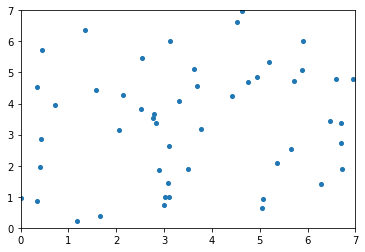

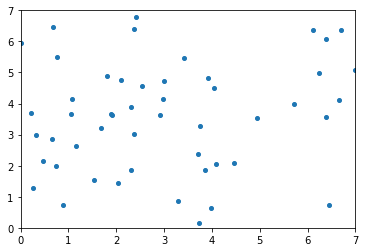

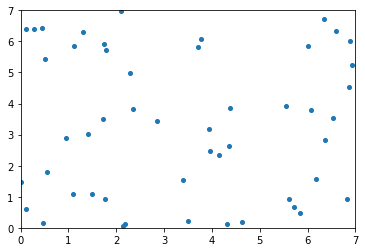

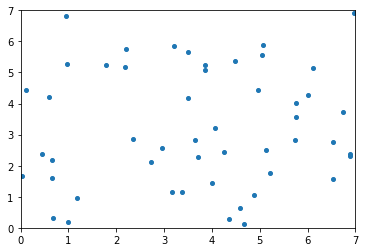

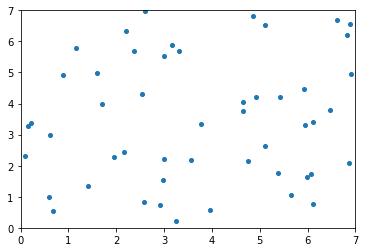

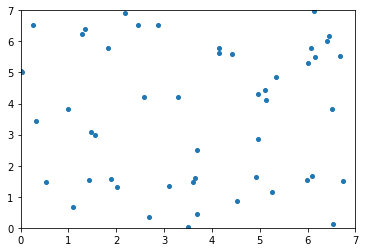

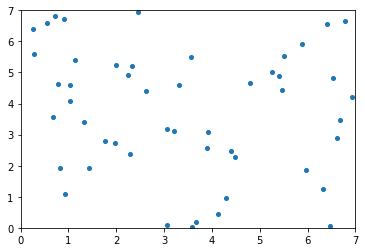

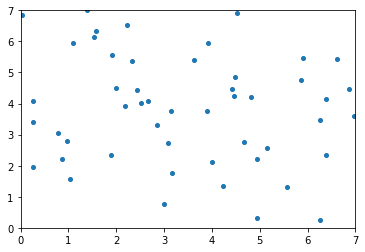

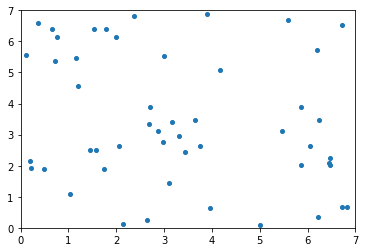

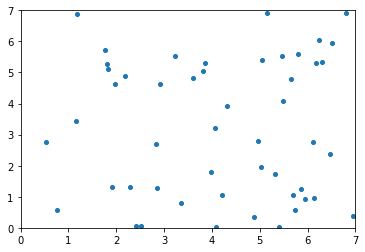

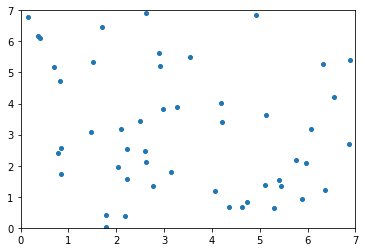

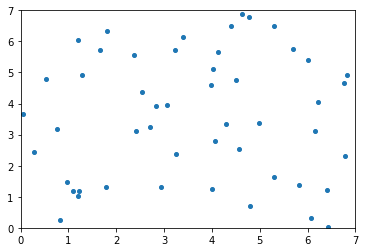

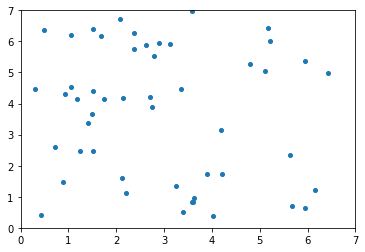

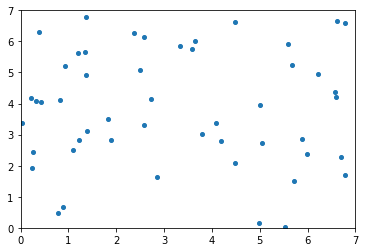

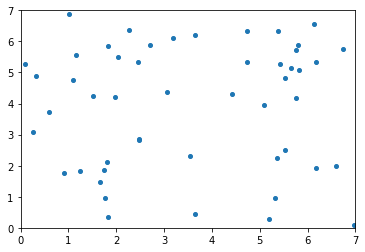

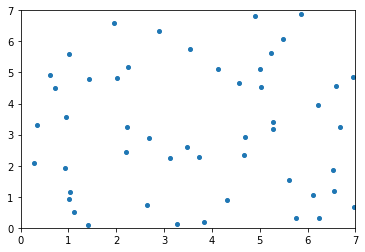

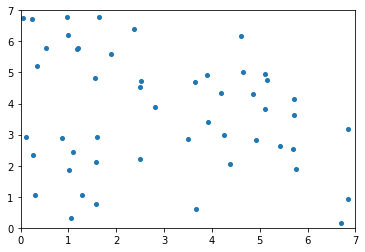

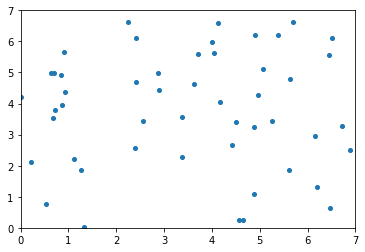

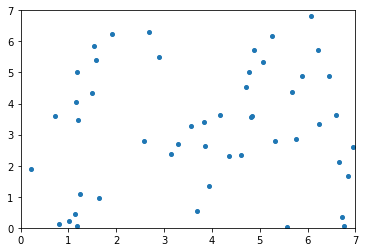

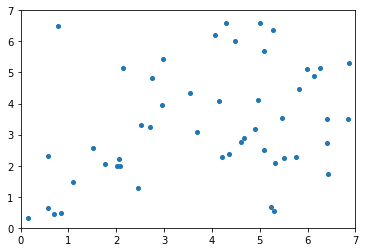

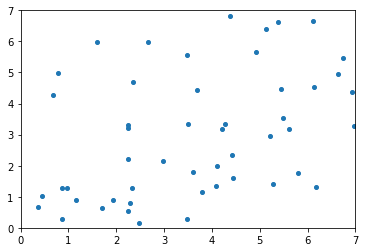

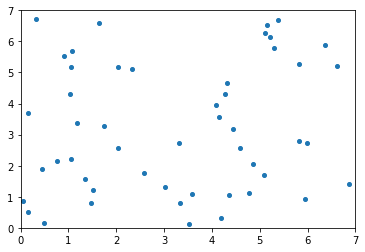

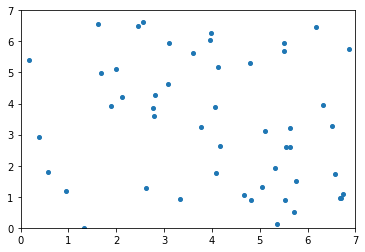

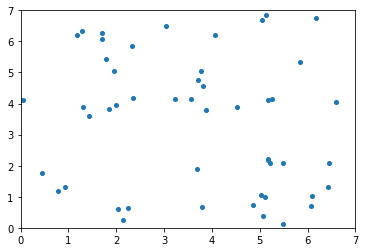

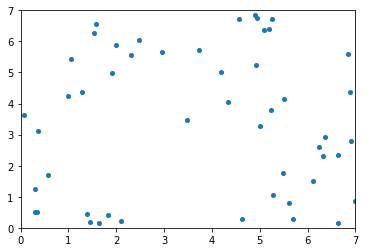

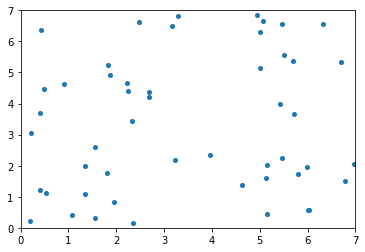

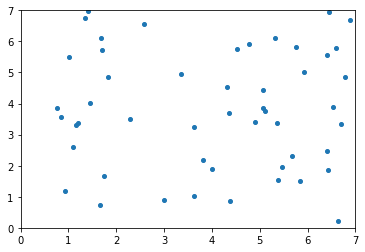

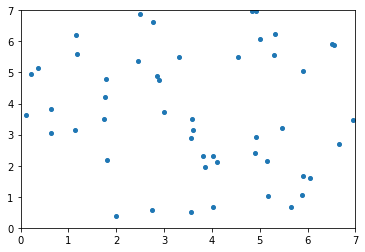

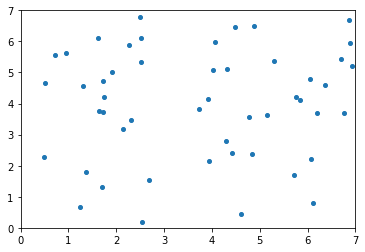

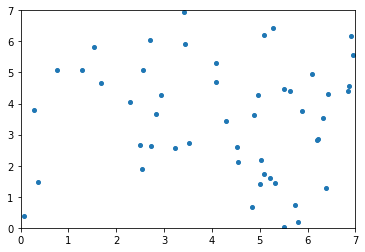

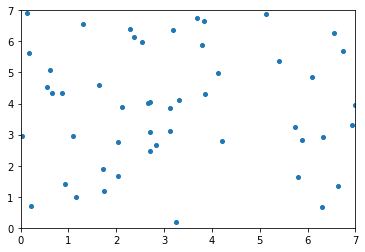

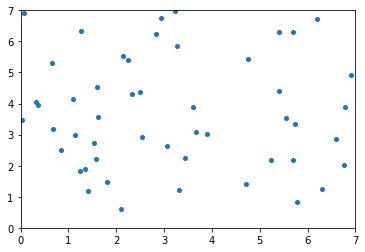

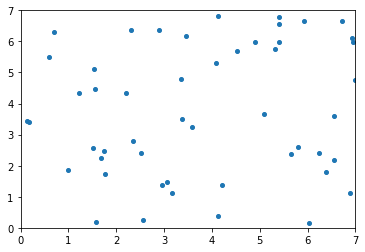

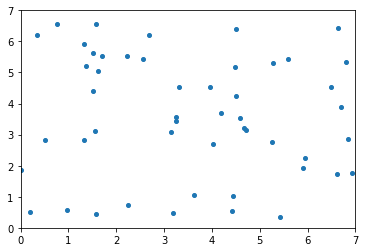

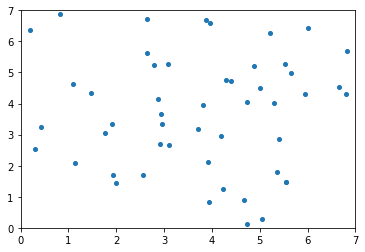

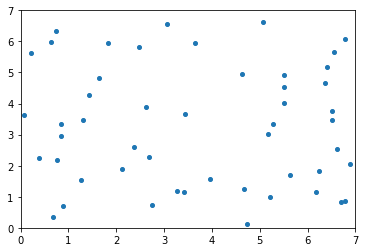

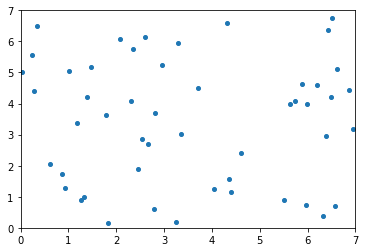

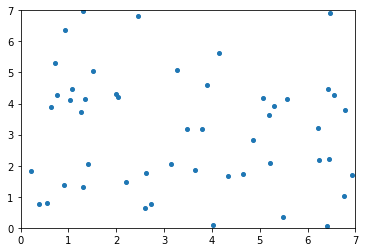

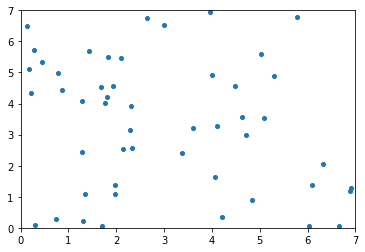

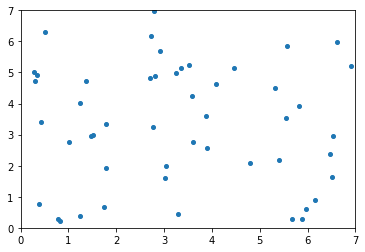

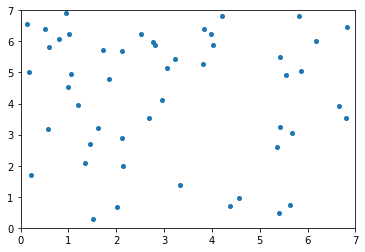

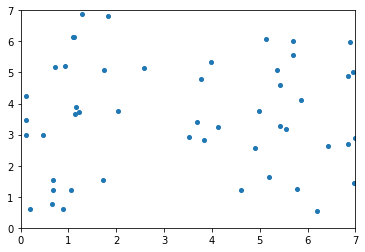

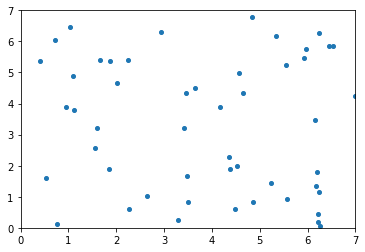

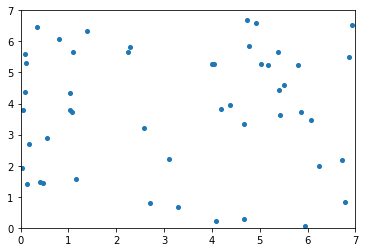

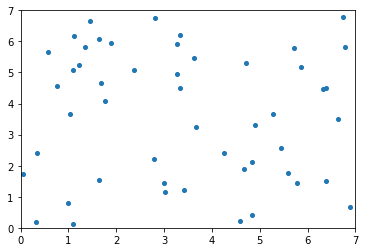

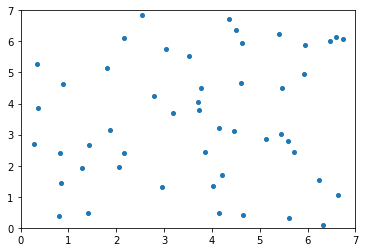

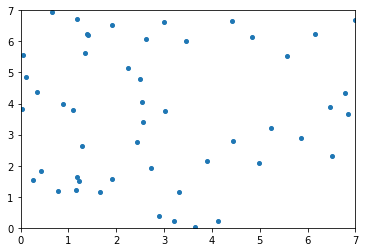

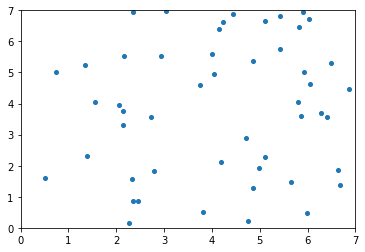

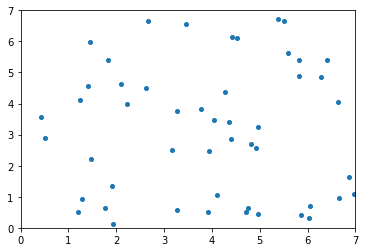

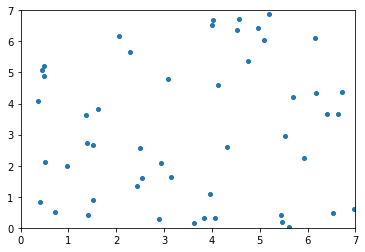

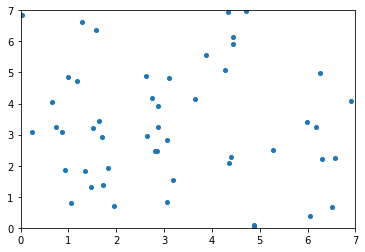

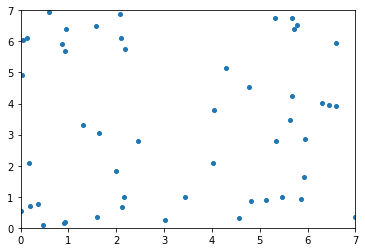

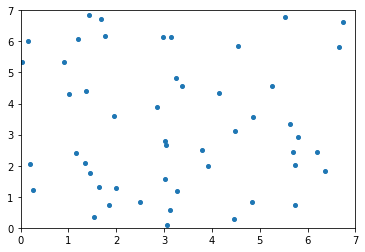

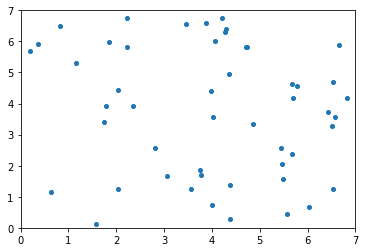

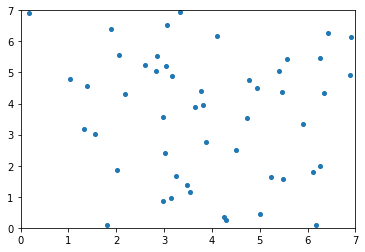

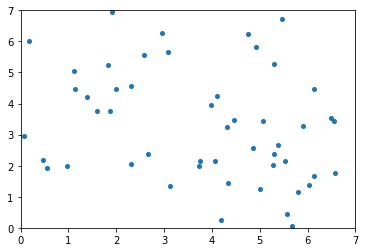

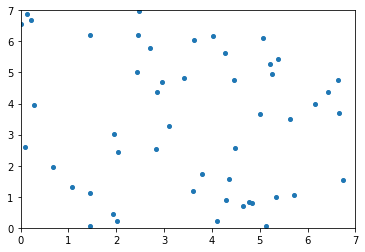

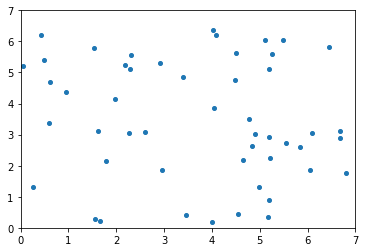

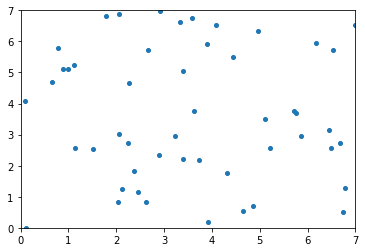

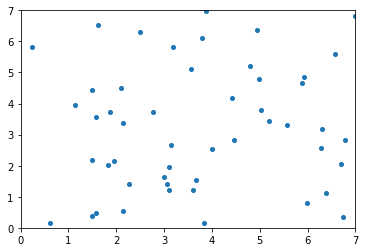

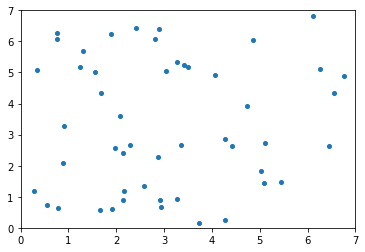

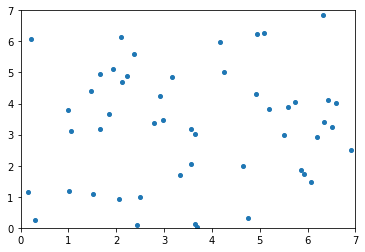

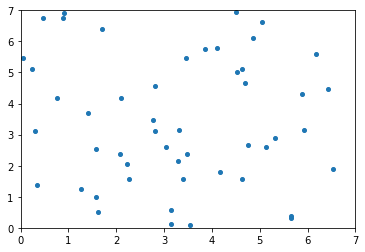

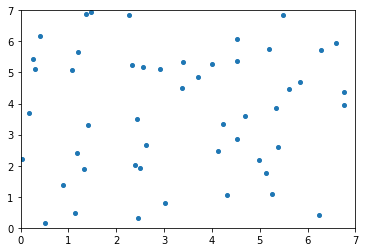

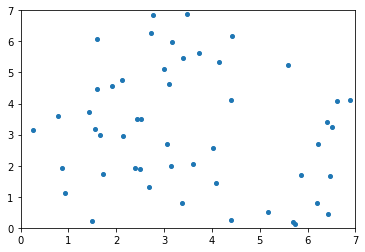

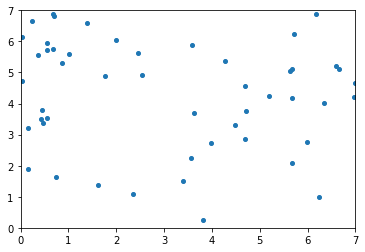

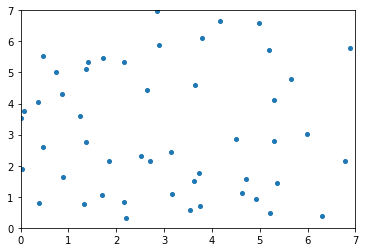

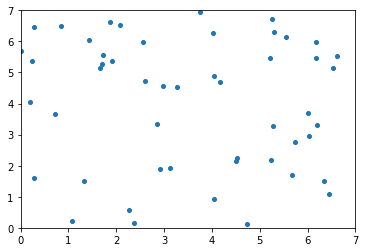

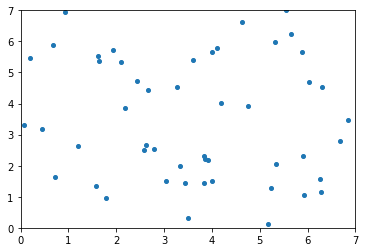

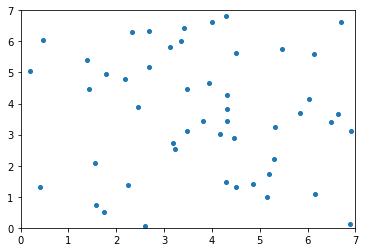

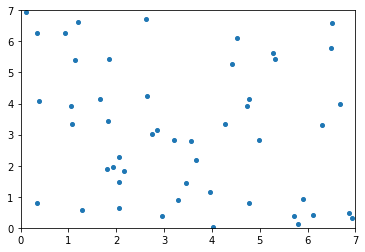

KeyboardInterrupt: 

In [64]:
y = 0
p = 0
t = 0
#time evolution until the firts impact
while y == 0:
    particles_fut[0,:] = [-0.003*p + 4,3.5]
    p += 1
    
    for r in range(len(particles_fut)): 
        d = np.real(dist(0))[r]
        if d < 0.1 and d !=0:
            
            plt.plot(particles_fut[:,0],particles_fut[:,1],'.', markersize = 8)
            plt.ylim(0,L)
            plt.xlim(0,L)
            plt.savefig('moldyn2/fig' + str(t+p).rjust(10, '0') + '.png')
            plt.show()
            y = 1
            
    np.copyto(particles_prev,particles)
    np.copyto(particles,particles_fut)
    
    plt.plot(particles_fut[:,0],particles_fut[:,1],'.', markersize = 8)
    plt.ylim(0,L)
    plt.xlim(0,L)
    plt.savefig('moldyn2/fig' + str(t+p).rjust(10, '0') + '.png')
    plt.show()
    
    
print('bateu')
for t in range(1,int(div)):
    for i in range(N):
        force = F(i)
        prox_pos(i)
    
    #print('prev',particles_prev[:])
    #print('pres',particles[:])
    #print("muda tempo")
    #updating the values of the arrays for the next interaction
    np.copyto(particles_prev,particles)
    np.copyto(particles,particles_fut)
    
    plt.plot(particles_prev[:,0],particles_prev[:,1],'.', markersize = 8)
    plt.ylim(0,L)
    plt.xlim(0,L)
    plt.savefig('moldyn2/fig' + str(t+p).rjust(10, '0') + '.png')
    plt.show()

In [ ]:
import gif
Kin_En = []
T_Pot_En = []
@gif.frame
def rodada(N):
    Pot_En = 0
    for i in range(N):
        for j in range(N):
            prox_pos(i,j)
            Pot_En += pot
    T_Pot_En.append(Pot_En)
    Kin_En.append((1/2)*(np.dot(1/(N**2),np.sum(np.linalg.norm(np.dot(1/(step),particles_fut[:,:] - particles[:,:]))))))
    
    np.copyto(particles_prev,particles)
    np.copyto(particles,particles_fut)
    
    plt.plot(particles_fut[:,:,0],particles_fut[:,:,1],'+')
    plt.ylim(0,L)
    plt.xlim(0,L)
    #plt.show()
    return T_Pot_En,Kin_En

frames = []
for t in range(1,int(div)):
    print("Tempo restante", int(div) - t)
    frame = rodada(N)
    frames.append(frame)

gif.save(frames, "gas.gif", duration=300)    